# Do Interictal DischargesAffect Functional Connectivity

author: Jeni Stiso (jeni.stiso@gmail.com)

words

In [136]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import AnovaRM
import palettable

%matplotlib inline
sns.set_context('poster')
sns.set_style("whitegrid")

In [69]:
sns.__version__

'0.9.0'

In [232]:
# directories - point this at you RAM data
RAM_dir = '/Volumes/bassett-data/Jeni/RAM/'

# load data
net_data = pd.read_csv(RAM_dir + 'group_analysis/network_stats.csv', index_col=0)
node_data = pd.read_csv(RAM_dir + 'group_analysis/node_stats.csv', index_col=0)

Check the data

In [233]:
net_data.head(10)

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
1         alpha_aec   480     -0.147560      0.040711         -0.001668   
2         alpha_coh   480      0.026600      0.066498         -0.006497   
3         alpha_plv   480     -0.087089     -0.034821          0.193575   
4          beta_aec   480     -0.156763      0.103991         -0.134420   
5          beta_coh   480     -0.083208      0.103922         -0.066475   
6          beta_plv   480     -0.451625      0.048240         -0.019108   
7      broadband_ar   480     -0.059598     -0.035118          0.033957   
8   broadband_xcorr   480      0.213717     -0.003001          0.008817   
9         gamma_aec   480     -0.035443      0.063498         -0.011348   
10        gamma_coh   480     -0.042193      0.117445          0.023808   

    str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
1           0.000593              0.039975                 NaN   
2           0.032060              0.067000                 NaN   
3           0.103116             -0.039975                 NaN   
4          -0.020781              0.106216                 NaN   
5          -0.083281              0.108416                 NaN   
6          -0.067779              0.049924                 NaN   
7           0.042931             -0.041823                 NaN   
8           0.107260             -0.006476                 NaN   
9           0.050703              0.062675                 NaN   
10         -0.065418              0.119212                 NaN   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1              -0.148739                 NaN                     NaN   
2               0.026646                 NaN                     NaN   
3              -0.096670                 NaN                     NaN   
4              -0.153487                 NaN                     NaN   
5              -0.076429                 NaN                     NaN   
6              -0.459203                 NaN                     NaN   
7              -0.069006                 NaN                     NaN   
8               0.213415                 NaN                     NaN   
9              -0.035871                 NaN                     NaN   
10             -0.044104                 NaN                     NaN   

   fc_measure  str_not_spike_beta_num       band    subj hand  age gender  \
1         aec                     NaN      alpha  R1284N    L   32      F   
2         coh                     NaN      alpha  R1284N    L   32      F   
3         plv                     NaN      alpha  R1284N    L   32      F   
4         aec                     NaN       beta  R1284N    L   32      F   
5         coh                     NaN       beta  R1284N    L   32      F   
6         plv                     NaN       beta  R1284N    L   32      F   
7          ar                     NaN  broadband  R1284N    L   32      F   
8       xcorr                     NaN  broadband  R1284N    L   32      F   
9         aec                     NaN      gamma  R1284N    L   32      F   
10        coh                     NaN      gamma  R1284N    L   32      F   

    race  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  
6    1.0  
7    1.0  
8    1.0  
9    1.0  
10   1.0

In [234]:
net_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 1 to 3808
Data columns (total 19 columns):
band_measure              3808 non-null object
n_tp                      3808 non-null int64
str_beta_bin              3664 non-null float64
str_beta_num              3664 non-null float64
str_soz_beta_bin          2640 non-null float64
str_soz_beta_num          2640 non-null float64
str_not_soz_beta_num      2626 non-null float64
str_spike_beta_num        2480 non-null float64
str_not_soz_beta_bin      2626 non-null float64
str_spike_beta_bin        2480 non-null float64
str_not_spike_beta_bin    2468 non-null float64
fc_measure                3808 non-null object
str_not_spike_beta_num    2468 non-null float64
band                      3808 non-null object
subj                      3808 non-null object
hand                      3712 non-null object
age                       3808 non-null int64
gender                    3808 non-null object
race                      3600 non-null

In [235]:
net_data.describe()

n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
count  3808.000000   3664.000000   3664.000000       2640.000000   
mean   1047.415966     -0.182228      0.098415         -0.193934   
std    1374.493613      1.859478      0.504049          1.826529   
min      15.000000    -37.326875     -9.247121        -37.439607   
25%     127.000000     -0.547117     -0.060842         -0.529259   
50%     518.000000     -0.110484      0.044074         -0.123870   
75%    1224.000000      0.211466      0.223805          0.217942   
max    7643.000000     38.137189      9.029754         13.284764   

       str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
count       2640.000000           2626.000000         2480.000000   
mean           0.108853              0.078111            0.095101   
std            0.487791              0.501856            0.358897   
min           -3.169730            -10.328701           -3.392342   
25%           -0.052860             -0.065094           -0.050677   
50%            0.053857              0.040941            0.063179   
75%            0.228427              0.210631            0.232686   
max            9.427373              8.465750            3.336776   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count           2626.000000         2480.000000             2468.000000   
mean              -0.130721           -0.138622               -0.108055   
std                1.903824            1.235070                1.244865   
min              -34.746494          -10.972012              -10.822055   
25%               -0.495880           -0.564480               -0.495468   
50%               -0.108773           -0.132169               -0.095773   
75%                0.208030            0.232372                0.254934   
max               42.350221           12.543848               12.952465   

       str_not_spike_beta_num          age         race  
count             2468.000000  3808.000000  3600.000000  
mean                 0.067898    34.899160     2.844444  
std                  0.365516    11.847837     1.217736  
min                 -3.468858     0.000000     1.000000  
25%                 -0.070960    25.000000     2.000000  
50%                  0.037064    34.000000     4.000000  
75%                  0.194409    44.000000     4.000000  
max                  3.214858    64.000000     4.000000

In [236]:
node_data.head(10)

elec     band_measure  n_tp  elec_spike  elec_in_soz  str_soz_beta_bin  \
1    G1        alpha_aec   480       0.025            0          0.056495   
2    G1        alpha_coh   480       0.025            0         -0.031579   
3    G1        alpha_plv   480       0.025            0         -0.160669   
4    G1         beta_aec   480       0.025            0          0.122450   
5    G1         beta_coh   480       0.025            0         -0.153265   
6    G1         beta_plv   480       0.025            0         -0.162403   
7    G1     broadband_ar   480       0.025            0          0.001168   
8    G1  broadband_xcorr   480       0.025            0         -0.205511   
9    G1        gamma_aec   480       0.025            0          0.146073   
10   G1        gamma_coh   480       0.025            0          0.025851   

    str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
1               0.410678                 NaN                     NaN   
2               0.486978                 NaN                     NaN   
3               0.257178                 NaN                     NaN   
4               0.235458                 NaN                     NaN   
5               0.301435                 NaN                     NaN   
6               0.124067                 NaN                     NaN   
7              -0.031480                 NaN                     NaN   
8               0.038282                 NaN                     NaN   
9               0.146308                 NaN                     NaN   
10              0.235198                 NaN                     NaN   

    str_beta_bin  ...        band            region        x        y  \
1       0.404353  ...       alpha  inferiortemporal -46.1038  19.0348   
2       0.481731  ...       alpha  inferiortemporal -46.1038  19.0348   
3       0.250114  ...       alpha  inferiortemporal -46.1038  19.0348   
4       0.231931  ...        beta  inferiortemporal -46.1038  19.0348   
5       0.299335  ...        beta  inferiortemporal -46.1038  19.0348   
6       0.118469  ...        beta  inferiortemporal -46.1038  19.0348   
7      -0.028097  ...   broadband  inferiortemporal -46.1038  19.0348   
8       0.032061  ...   broadband  inferiortemporal -46.1038  19.0348   
9       0.145381  ...       gamma  inferiortemporal -46.1038  19.0348   
10      0.233292  ...       gamma  inferiortemporal -46.1038  19.0348   

            z    subj hand age  gender  race  
1  -44.942917  R1284N    L  32       F   1.0  
2  -44.942917  R1284N    L  32       F   1.0  
3  -44.942917  R1284N    L  32       F   1.0  
4  -44.942917  R1284N    L  32       F   1.0  
5  -44.942917  R1284N    L  32       F   1.0  
6  -44.942917  R1284N    L  32       F   1.0  
7  -44.942917  R1284N    L  32       F   1.0  
8  -44.942917  R1284N    L  32       F   1.0  
9  -44.942917  R1284N    L  32       F   1.0  
10 -44.942917  R1284N    L  32       F   1.0  

[10 rows x 26 columns]

In [237]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365920 entries, 1 to 365920
Data columns (total 26 columns):
elec                      365920 non-null object
band_measure              365920 non-null object
n_tp                      365920 non-null int64
elec_spike                365920 non-null float64
elec_in_soz               365920 non-null int64
str_soz_beta_bin          253008 non-null float64
str_not_soz_beta_bin      233342 non-null float64
str_spike_beta_bin        237792 non-null float64
str_not_spike_beta_bin    210684 non-null float64
str_beta_bin              353536 non-null float64
str_soz_beta_num          253008 non-null float64
str_not_soz_beta_num      233342 non-null float64
str_spike_beta_num        237792 non-null float64
str_beta_num              353536 non-null float64
str_not_spike_beta_num    210684 non-null float64
fc_measure                365920 non-null object
band                      365920 non-null object
region                    334176 non-null objec

In [238]:
node_data.describe()

n_tp     elec_spike    elec_in_soz  str_soz_beta_bin  \
count  365920.000000  365920.000000  365920.000000     253008.000000   
mean      998.883209       0.020306       0.058854         -0.075380   
std      1323.811462       0.044707       0.235352          1.629912   
min        11.000000       0.000000       0.000000        -53.827674   
25%       127.000000       0.000000       0.000000         -0.354316   
50%       480.000000       0.002817       0.000000         -0.045637   
75%      1172.000000       0.018156       0.000000          0.219502   
max      7643.000000       0.600000       1.000000         60.862259   

       str_not_soz_beta_bin  str_spike_beta_bin  str_not_spike_beta_bin  \
count         233342.000000       237792.000000           210684.000000   
mean              -0.091318           -0.071693               -0.089690   
std                1.706776            1.234893                1.235288   
min              -57.259730          -31.979384              -25.591782   
25%               -0.409060           -0.395769               -0.412249   
50%               -0.063709           -0.054480               -0.069186   
75%                0.211162            0.235068                0.220274   
max               58.095603           28.979234               28.388302   

        str_beta_bin  str_soz_beta_num  str_not_soz_beta_num  \
count  353536.000000     253008.000000         233342.000000   
mean       -0.107615          0.058038              0.075789   
std         1.619877          0.450240              0.473973   
min       -55.068650        -14.910735            -14.447505   
25%        -0.425279         -0.053154             -0.046743   
50%        -0.060591          0.030491              0.040926   
75%         0.235562          0.151645              0.179409   
max        55.843124         13.554468             14.033875   

       str_spike_beta_num   str_beta_num  str_not_spike_beta_num  \
count       237792.000000  353536.000000           210684.000000   
mean             0.060705       0.082637                0.073415   
std              0.378056       0.458891                0.382200   
min             -7.876960     -13.977493               -7.957696   
25%             -0.053372      -0.048565               -0.049511   
50%              0.035947       0.041525                0.039876   
75%              0.166159       0.187243                0.178094   
max              8.984809      13.500064                9.077148   

                   x              y              z            age  \
count  365920.000000  365920.000000  365920.000000  365920.000000   
mean      -10.628685      -6.088854       4.227832      35.008089   
std        45.720687      36.678254      41.276005      11.947221   
min      -165.993000    -143.909000    -402.070855       0.000000   
25%       -47.312200     -29.001300     -19.620372      25.000000   
50%       -21.955050      -7.567730       0.372576      34.000000   
75%        30.443100      15.907100      31.186192      44.000000   
max       173.816000     207.770000      93.980799      64.000000   

                race  
count  348432.000000  
mean        2.884695  
std         1.220126  
min         1.000000  
25%         2.000000  
50%         4.000000  
75%         4.000000  
max         4.000000

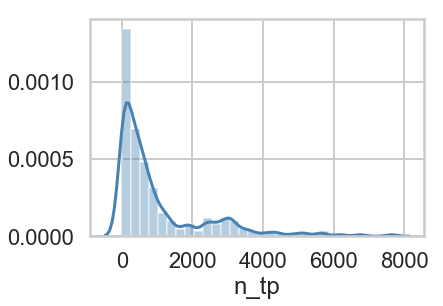

In [239]:
sns.distplot(net_data['n_tp'], bins=30, color='steelblue')

In [240]:
net_data.subj.nunique()

174

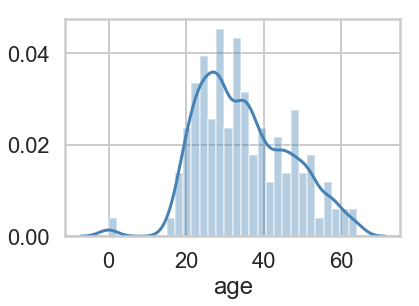

In [241]:
sns.distplot(net_data['age'], bins=30, color='steelblue')
mean_age = net_data['age'].mean()

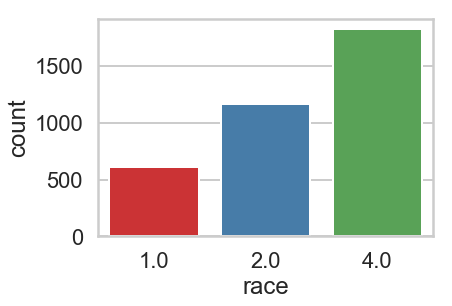

In [242]:
sns.countplot(data=net_data, x='race', )
mean_race = 4

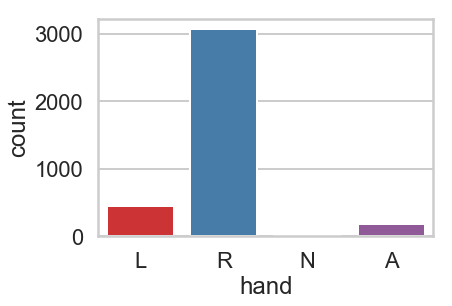

In [243]:
sns.countplot(data=net_data, x='hand', )
mean_hand = 'R'

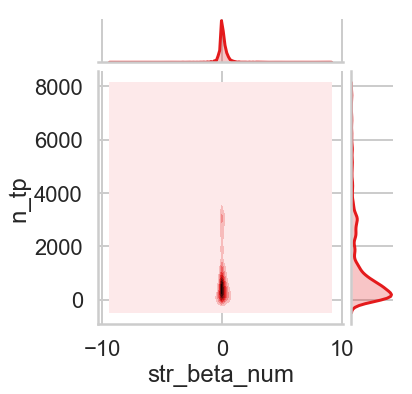

In [244]:
sns.jointplot(data=net_data, x='str_beta_num', y='n_tp', kind='kde' )

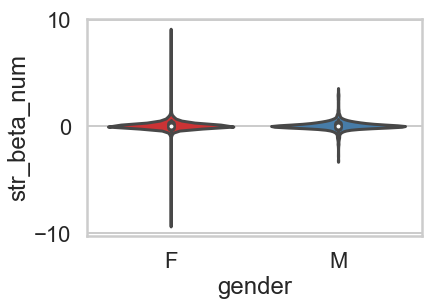

In [245]:
sns.violinplot(data=net_data, x='gender', y='str_beta_num', cut=True)

In [246]:
# add means for null values
net_data.loc[net_data['age'].isnull(), 'age'] = mean_age
net_data.loc[net_data['race'].isnull(), 'race'] = mean_race
net_data.loc[net_data['hand'].isnull(), 'hand'] = mean_hand

# same for node data
node_data.loc[node_data['age'].isnull(), 'age'] = mean_age
node_data.loc[node_data['race'].isnull(), 'race'] = mean_race
node_data.loc[node_data['hand'].isnull(), 'hand'] = mean_hand

In [251]:
net_data.dropna().subj.nunique()


111

In [248]:
net_data.dropna(inplace=True)
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365920 entries, 1 to 365920
Data columns (total 26 columns):
elec                      365920 non-null object
band_measure              365920 non-null object
n_tp                      365920 non-null int64
elec_spike                365920 non-null float64
elec_in_soz               365920 non-null int64
str_soz_beta_bin          253008 non-null float64
str_not_soz_beta_bin      233342 non-null float64
str_spike_beta_bin        237792 non-null float64
str_not_spike_beta_bin    210684 non-null float64
str_beta_bin              353536 non-null float64
str_soz_beta_num          253008 non-null float64
str_not_soz_beta_num      233342 non-null float64
str_spike_beta_num        237792 non-null float64
str_beta_num              353536 non-null float64
str_not_spike_beta_num    210684 non-null float64
fc_measure                365920 non-null object
band                      365920 non-null object
region                    334176 non-null objec

In [77]:
node_data.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2322 entries, 1 to 3672
Data columns (total 27 columns):
elec                      2322 non-null object
band_measure              2322 non-null object
n_tp                      2322 non-null int64
elec_spike                2322 non-null float64
elec_in_soz               2322 non-null int64
str_soz_beta_bin          2322 non-null float64
str_not_soz_beta_bin      2322 non-null float64
str_spike_beta_bin        2322 non-null float64
str_not_spike_beta_bin    2322 non-null float64
str_beta_bin              2322 non-null float64
str_soz_beta_num          2322 non-null float64
str_not_soz_beta_num      2322 non-null float64
str_spike_beta_num        2322 non-null float64
str_beta_num              2322 non-null float64
str_not_spike_beta_num    2322 non-null float64
fc_measure                2322 non-null object
band                      2322 non-null object
region                    2322 non-null object
x                         2322 non-nul

In [85]:
# save
net_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_data_clean.csv')

## Effects on Network Measures

test if intereictal spike regularly change network strength.

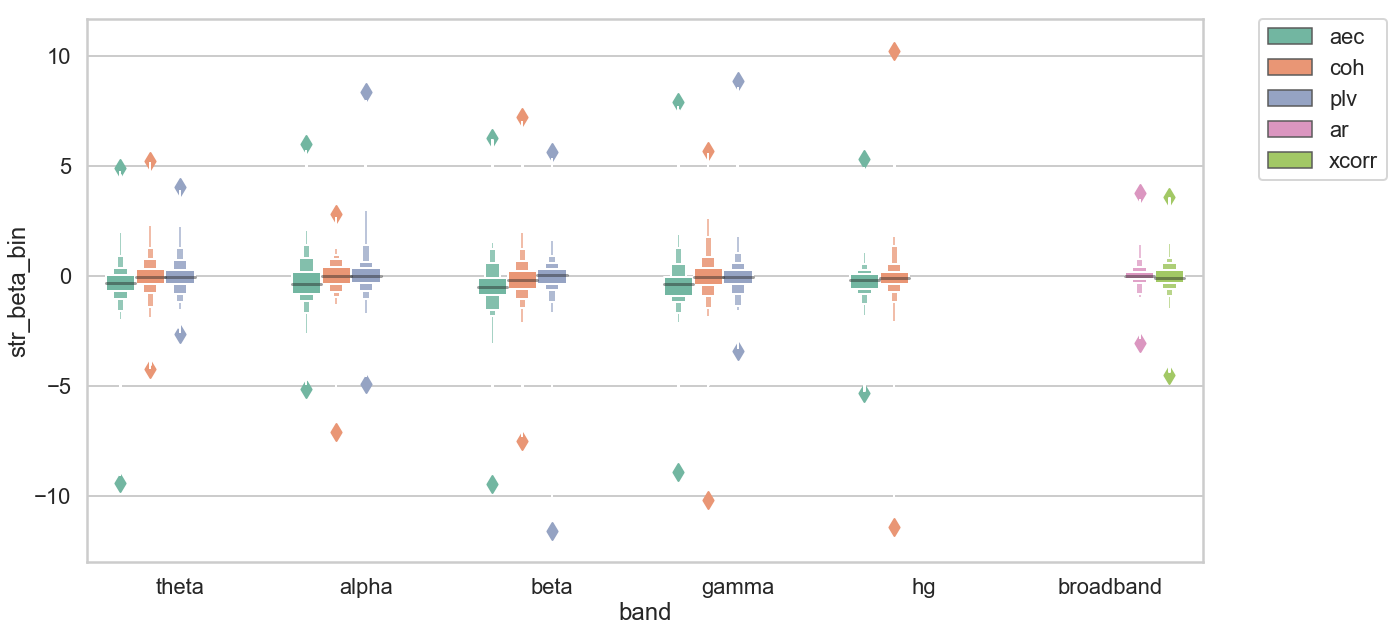

In [191]:
# color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_bin', hue='fc_measure', 
            order=['theta','alpha','beta','gamma','hg','broadband'])
#sns.stripplot( data=net_data, x="band", y='str_beta_bin',hue='fc_measure',color='black',jitter=True, dodge=True,
#            alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-5,5)
plt.savefig("../img/net_bin_str.eps")


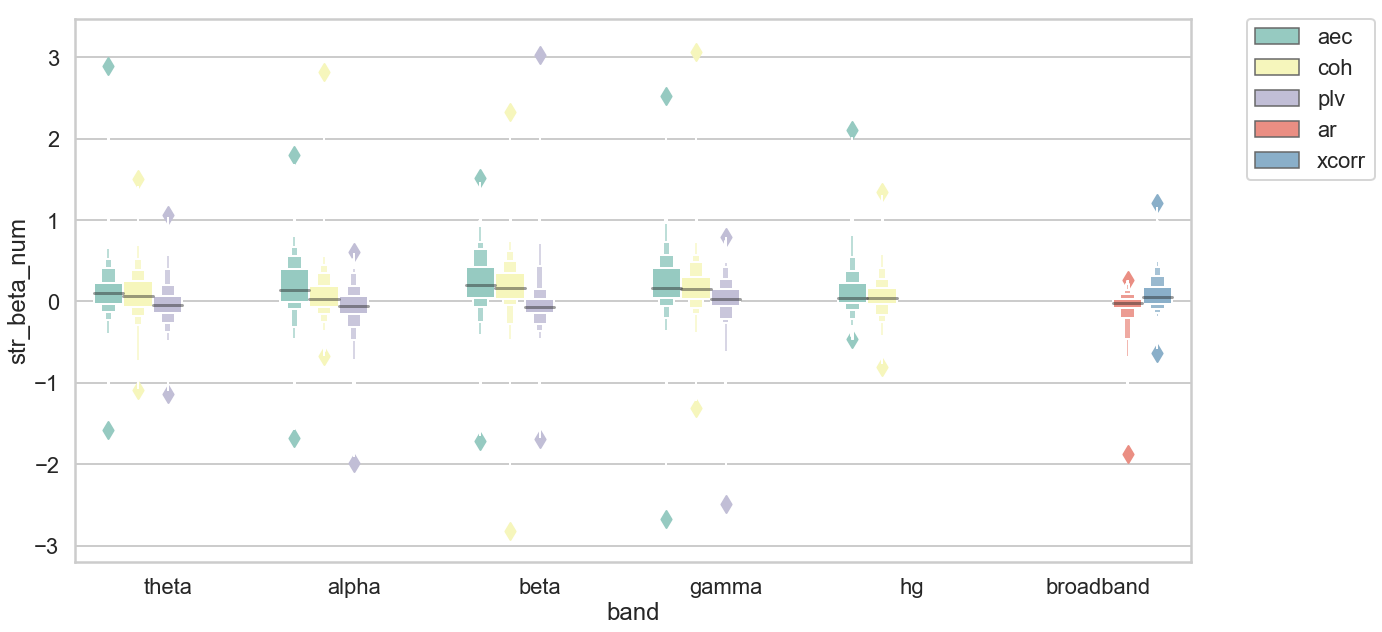

In [190]:
# color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette('Set2')
    
plt.figure(figsize=(20,10))
sns.boxenplot( data=net_data, x="band", y='str_beta_num', hue='fc_measure',
           order=['theta','alpha','beta','gamma','hg','broadband'], palette="Set3")
#sns.stripplot( data=net_data, x="band", y='str_beta_num',hue='fc_measure',color='black',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, order=['theta','alpha','beta','gamma','hg','broadband'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.ylim(-2,2)
plt.savefig("../img/net_num_str.eps")

Is it different within or outside of the SOZ?

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


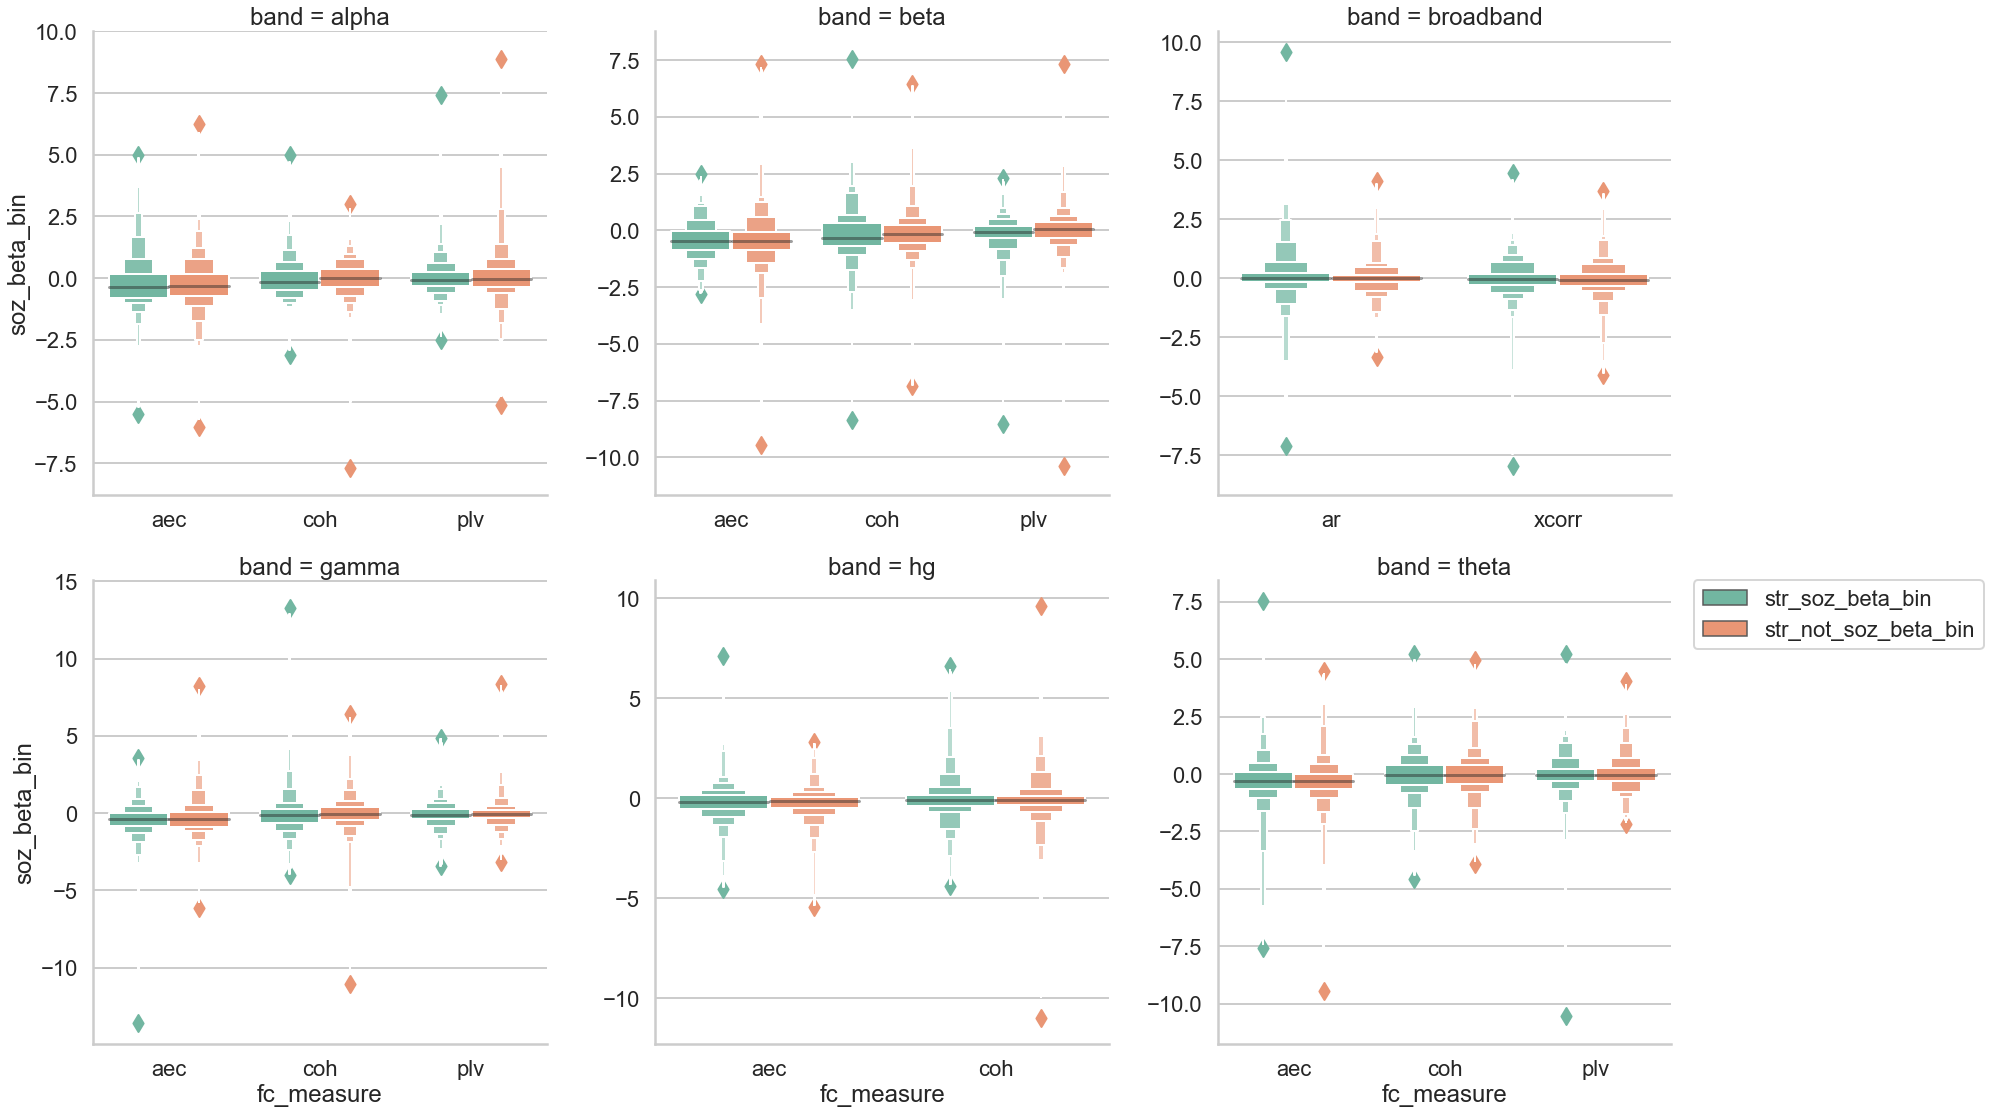

In [186]:
# reshape data
soz_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                           value_vars =['str_soz_beta_bin','str_not_soz_beta_bin'],  
                           var_name ='SOZ', value_name ='soz_beta_bin')  

#color pallette
# colors = ['#5b6c88', '#f0eee2']
# custom_palette = sns.set_palette("Set1")
    
g = sns.FacetGrid(data=soz_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_bin', 'SOZ', palette = "Set2", hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_bin', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_bin','str_not_soz_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_soz_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


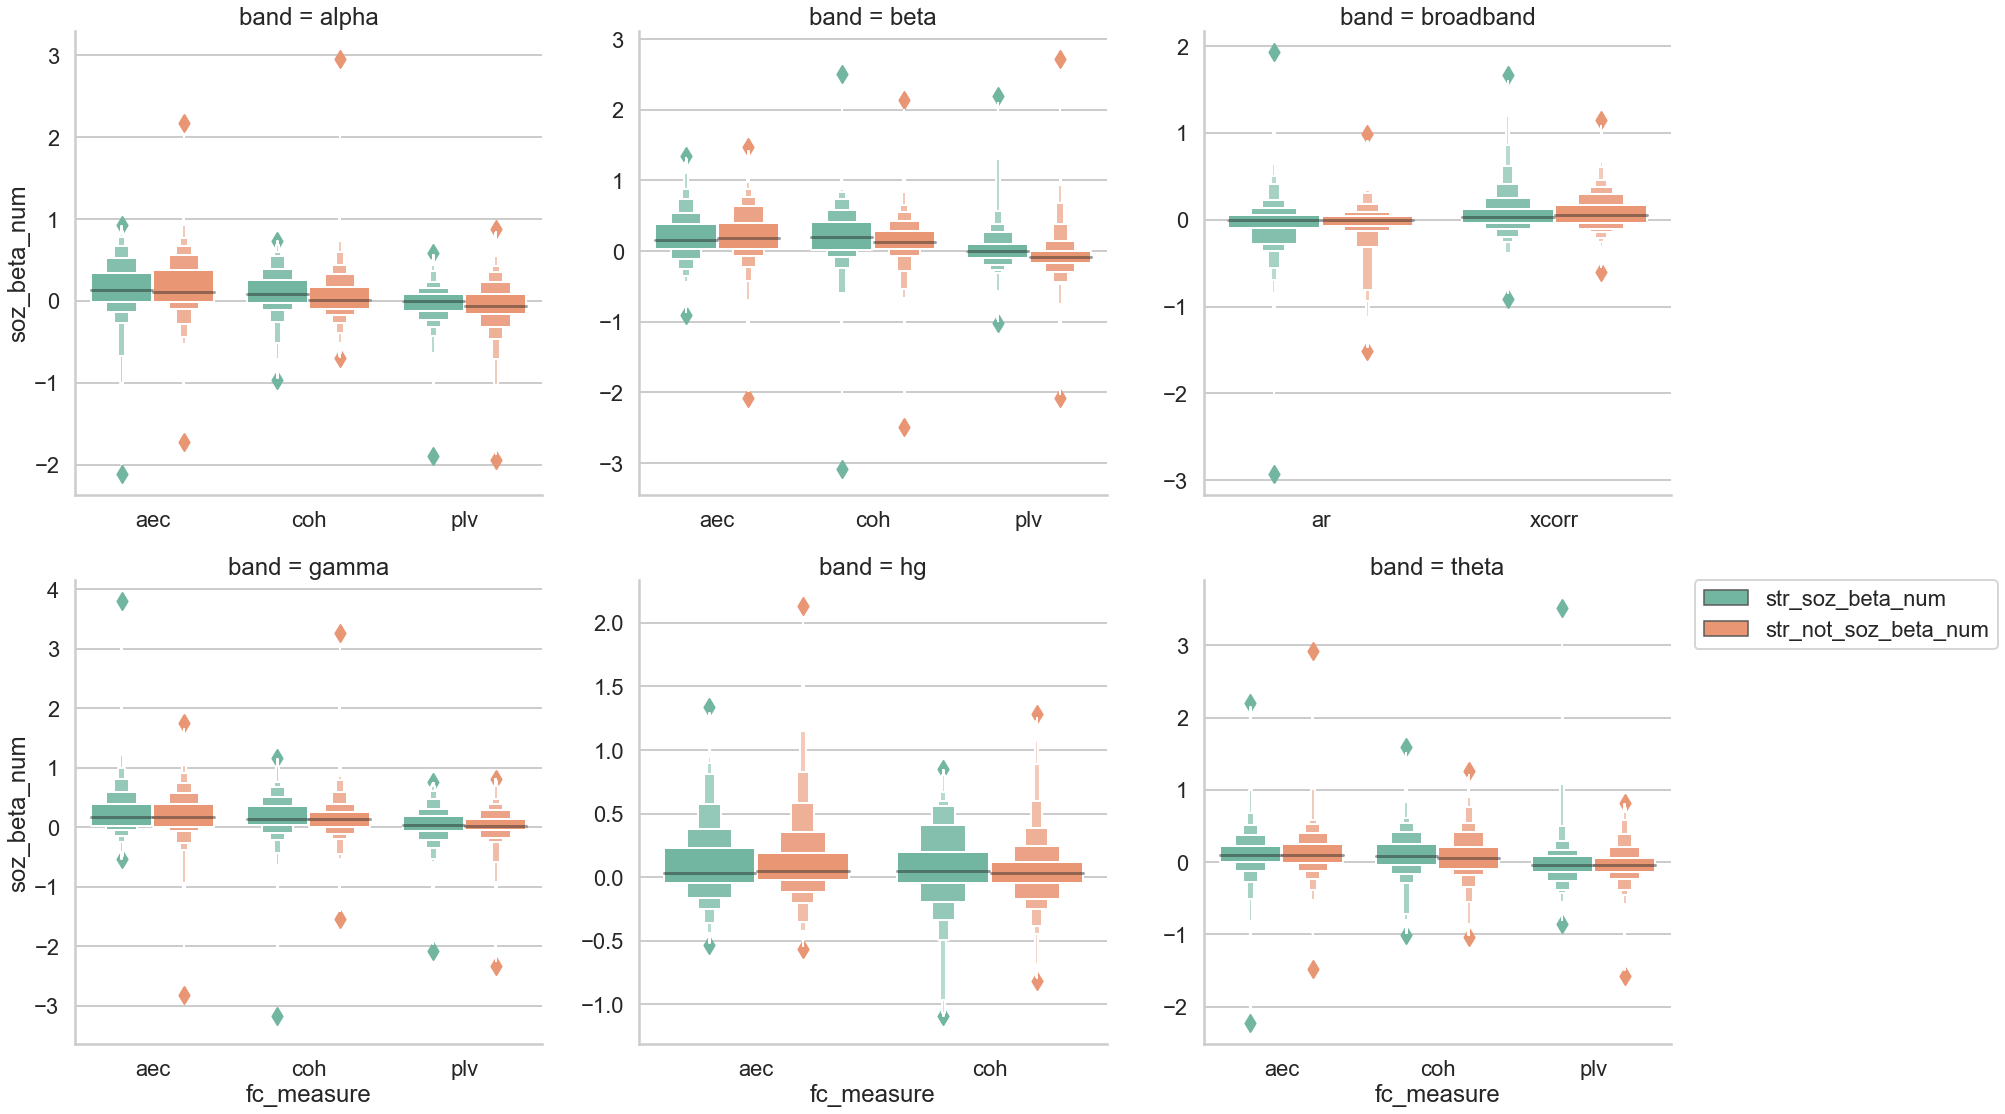

In [187]:
# reshape data
soz_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], value_vars =['str_soz_beta_num','str_not_soz_beta_num'],  var_name ='SOZ', value_name ='soz_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=soz_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'soz_beta_num', 'SOZ', palette = "Set2", hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'soz_beta_num', 'SOZ',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_soz_beta_num','str_not_soz_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_num.eps")

In [192]:
# save
# reformat before merge
soz_net_data_bin['SOZ'].replace('str_soz_beta_bin','within', inplace=True)
soz_net_data_bin['SOZ'].replace('str_not_soz_beta_bin','outside', inplace=True)
soz_net_data_num['SOZ'].replace('str_soz_beta_num','within', inplace=True)
soz_net_data_num['SOZ'].replace('str_not_soz_beta_num','outside', inplace=True)
soz_net_data = pd.merge(soz_net_data_bin, soz_net_data_num, on=['band', 'fc_measure', 'subj', 'SOZ', 'hand','race','gender','age'])
soz_net_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_soz_data_clean.csv')

Repeat for spikes

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


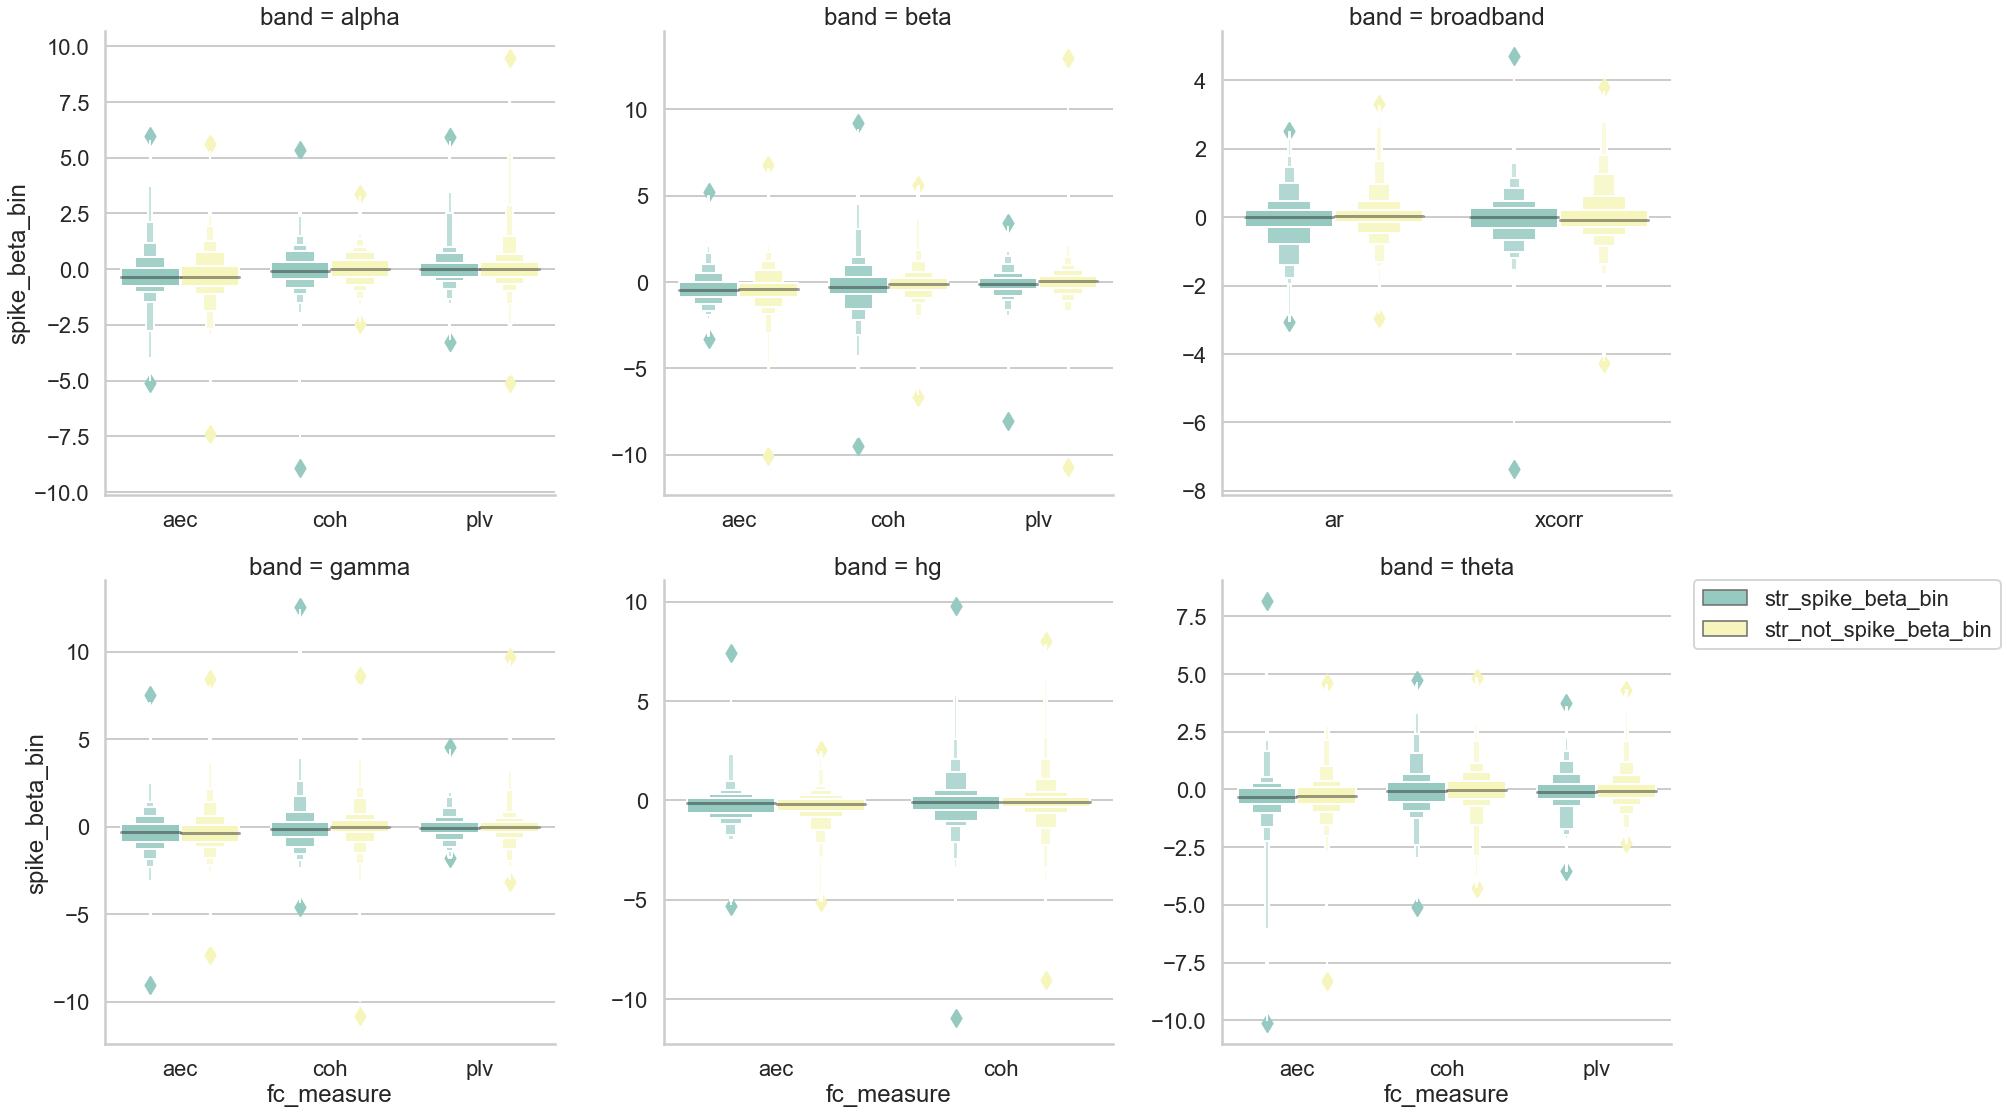

In [221]:
# reshape data
spike_net_data_bin = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_bin','str_not_spike_beta_bin'],  
                             var_name ='spike', value_name ='spike_beta_bin')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')
    
g = sns.FacetGrid(data=spike_net_data_bin, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_bin', 'spike', palette = "Set3", hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_bin', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_bin','str_not_spike_beta_bin'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
#    plt.setp(ax.lines, color=".9")
    
g.savefig("../img/net_spike_bin.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


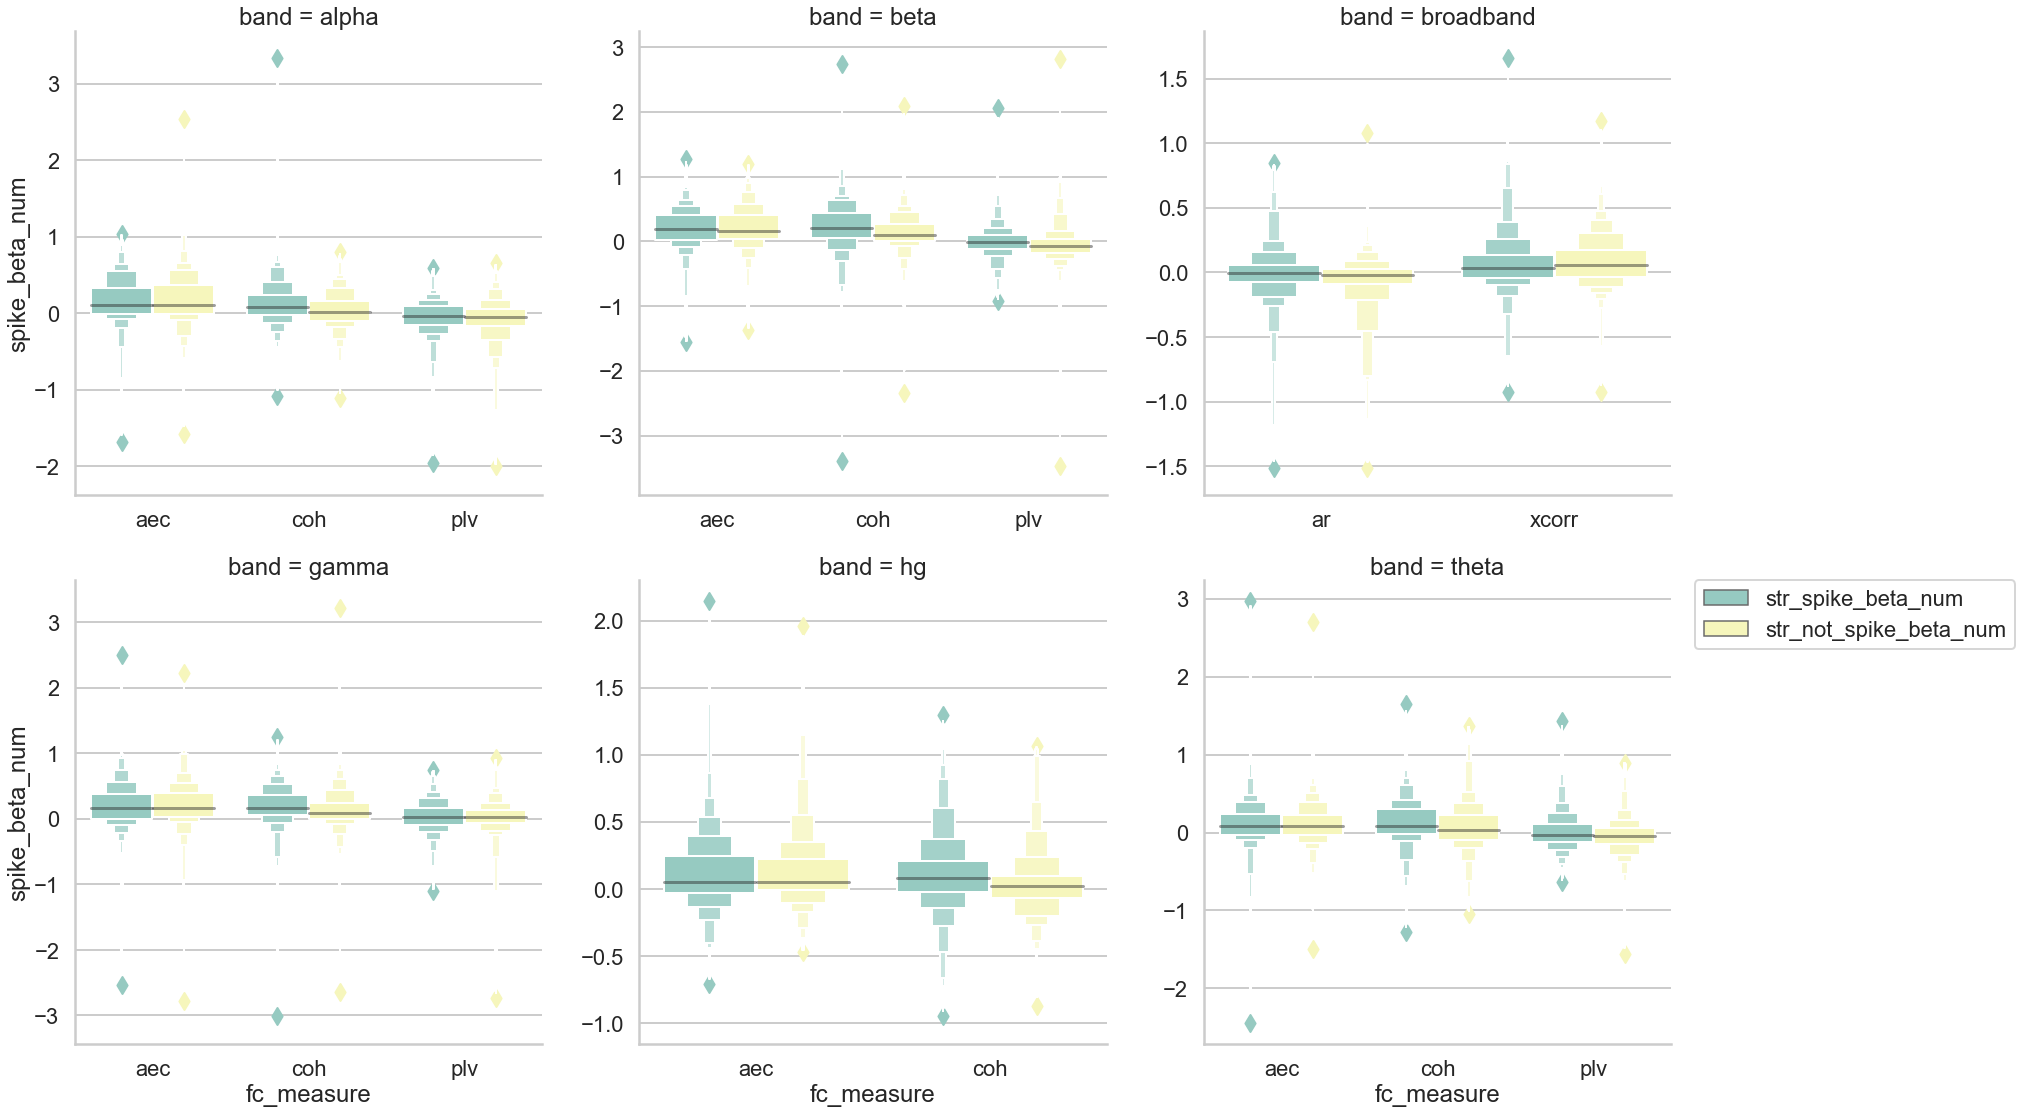

In [222]:
# reshape data
spike_net_data_num = pd.melt(net_data, id_vars =['band', 'fc_measure', 'subj', 'hand','race','gender','age'], 
                             value_vars =['str_spike_beta_num','str_not_spike_beta_num'],  
                             var_name ='spike', value_name ='spike_beta_num')  

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set1')
    
g = sns.FacetGrid(data=spike_net_data_num, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'spike_beta_num', 'spike', palette = "Set3", hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
#g.map(sns.stripplot, 'fc_measure', 'spike_beta_num', 'spike',jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6, hue_order=['str_spike_beta_num','str_not_spike_beta_num'])
# g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
# g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
# g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
g.savefig("../img/net_spike_num.eps")

In [223]:
# save
# reformat before merge
spike_net_data_bin['spike'].replace('str_spike_beta_bin','within', inplace=True)
spike_net_data_bin['spike'].replace('str_not_spike_beta_bin','outside', inplace=True)
spike_net_data_num['spike'].replace('str_spike_beta_num','within', inplace=True)
spike_net_data_num['spike'].replace('str_not_spike_beta_num','outside', inplace=True)
spike_net_data = pd.merge(spike_net_data_bin, spike_net_data_num, on=['band', 'fc_measure', 'subj', 'spike', 'hand','race','gender','age'])
spike_net_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_spike_data_clean.csv')

## Effects on Node Measures

relationship between the number of spikes seen in that node, and the beta value

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


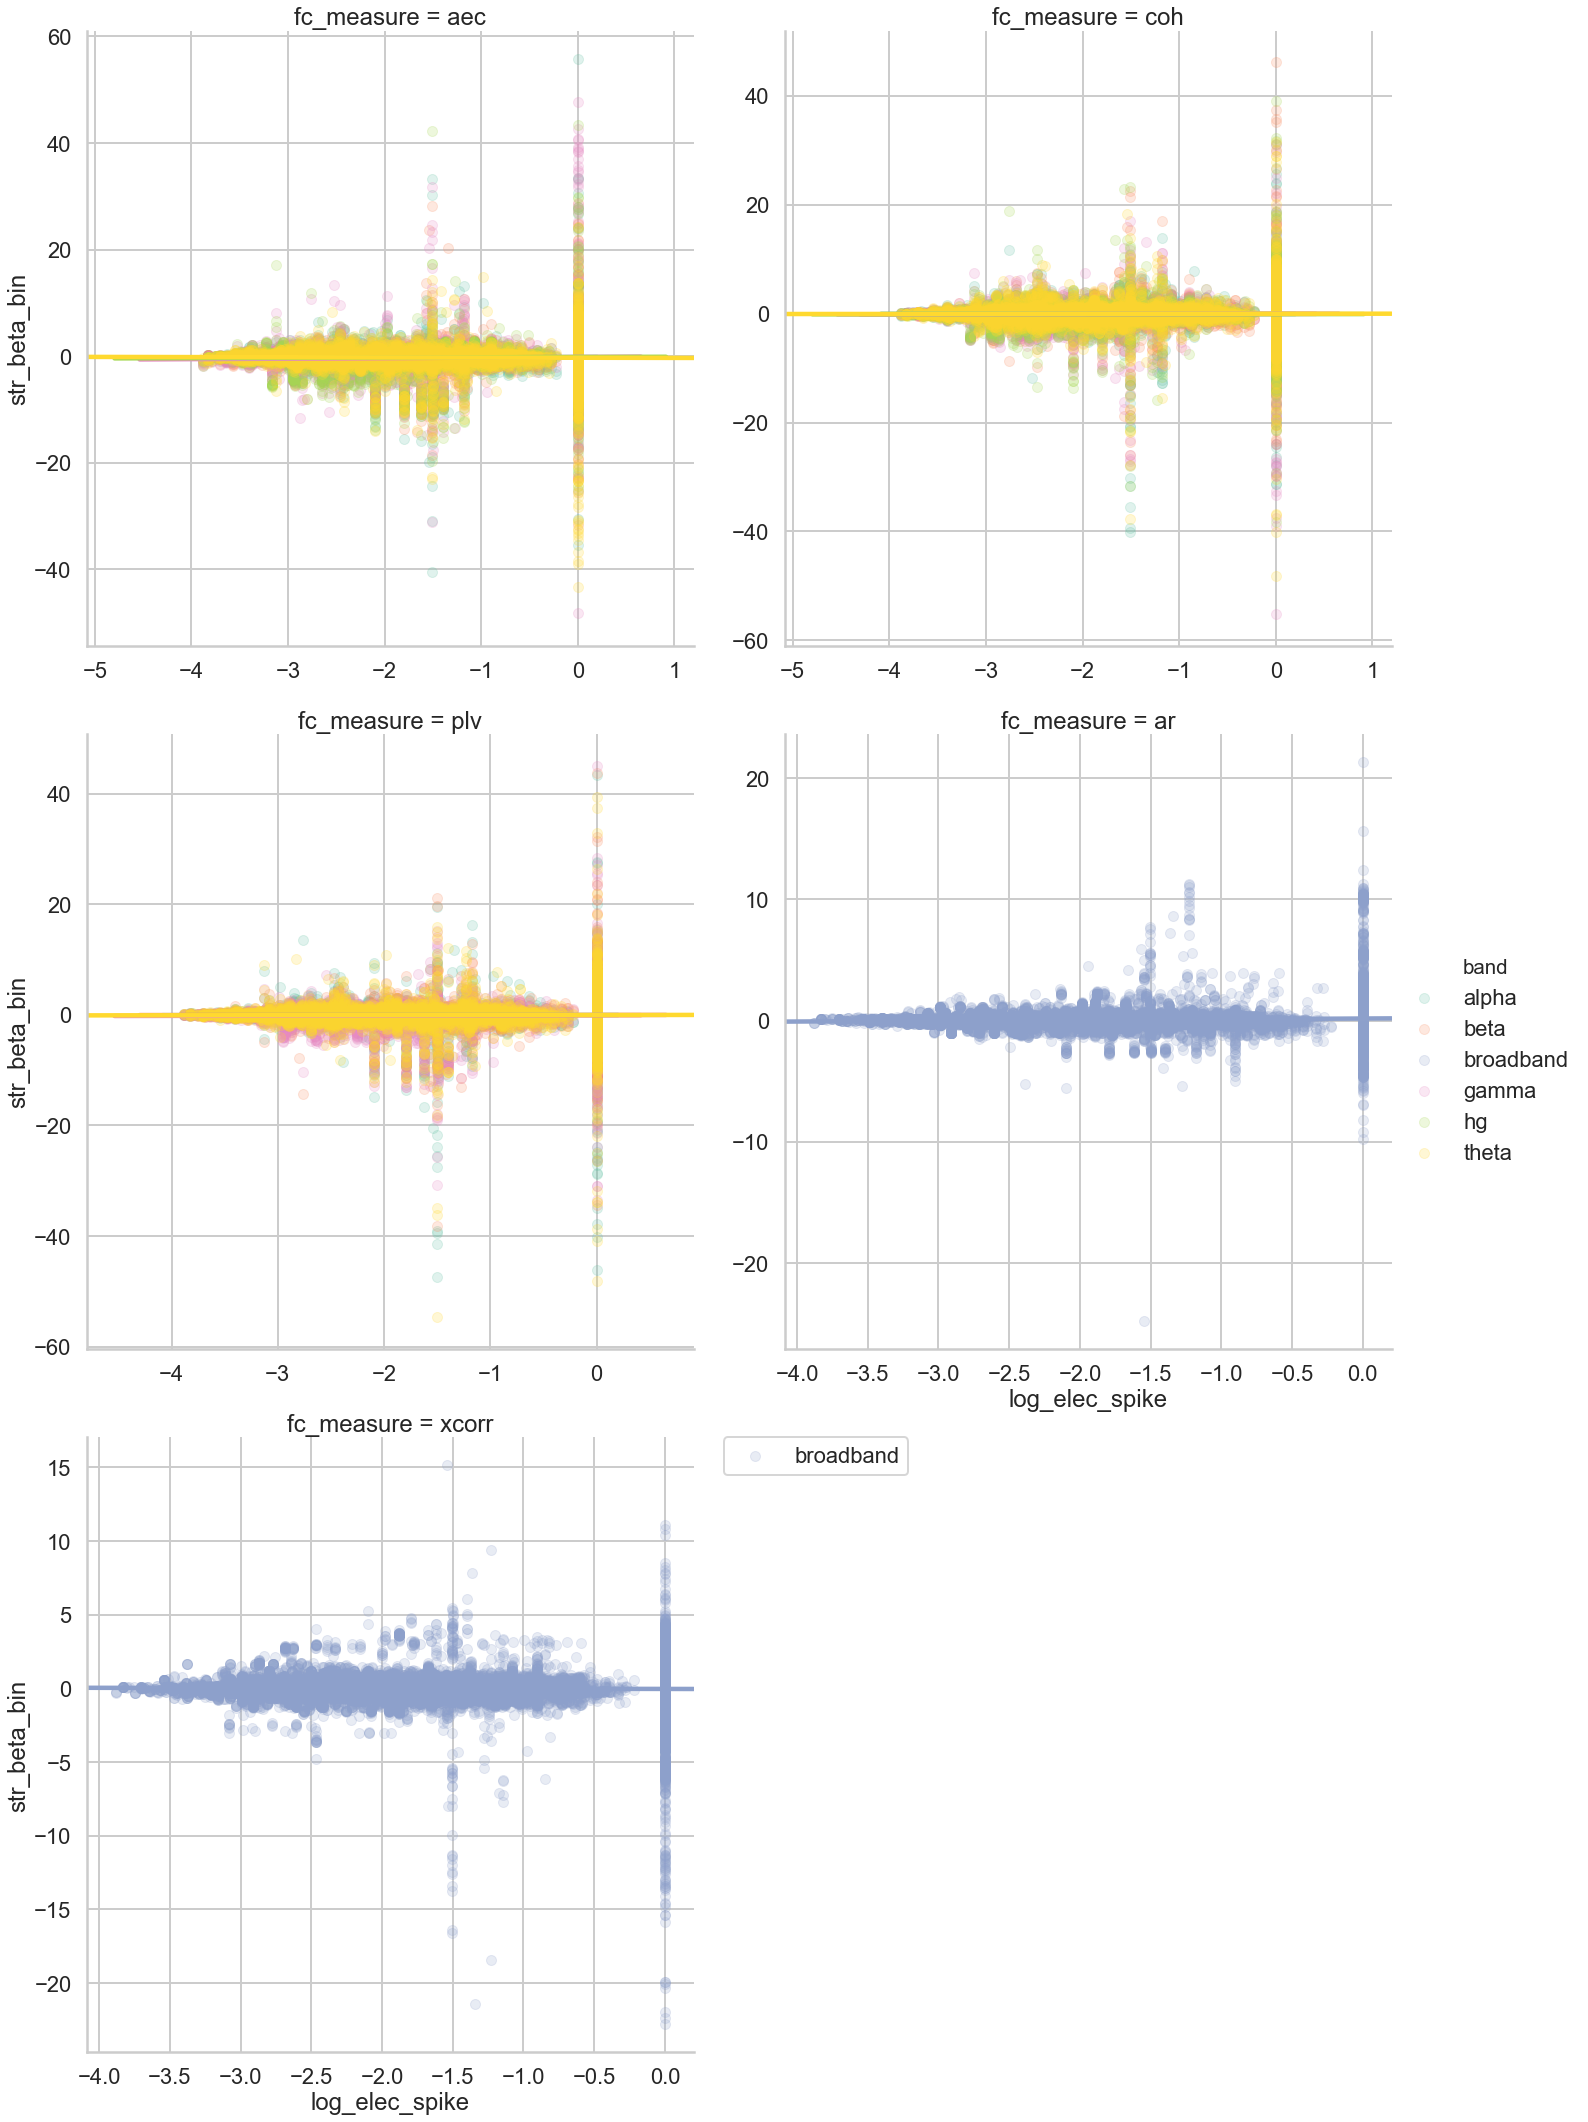

In [94]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_bin', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


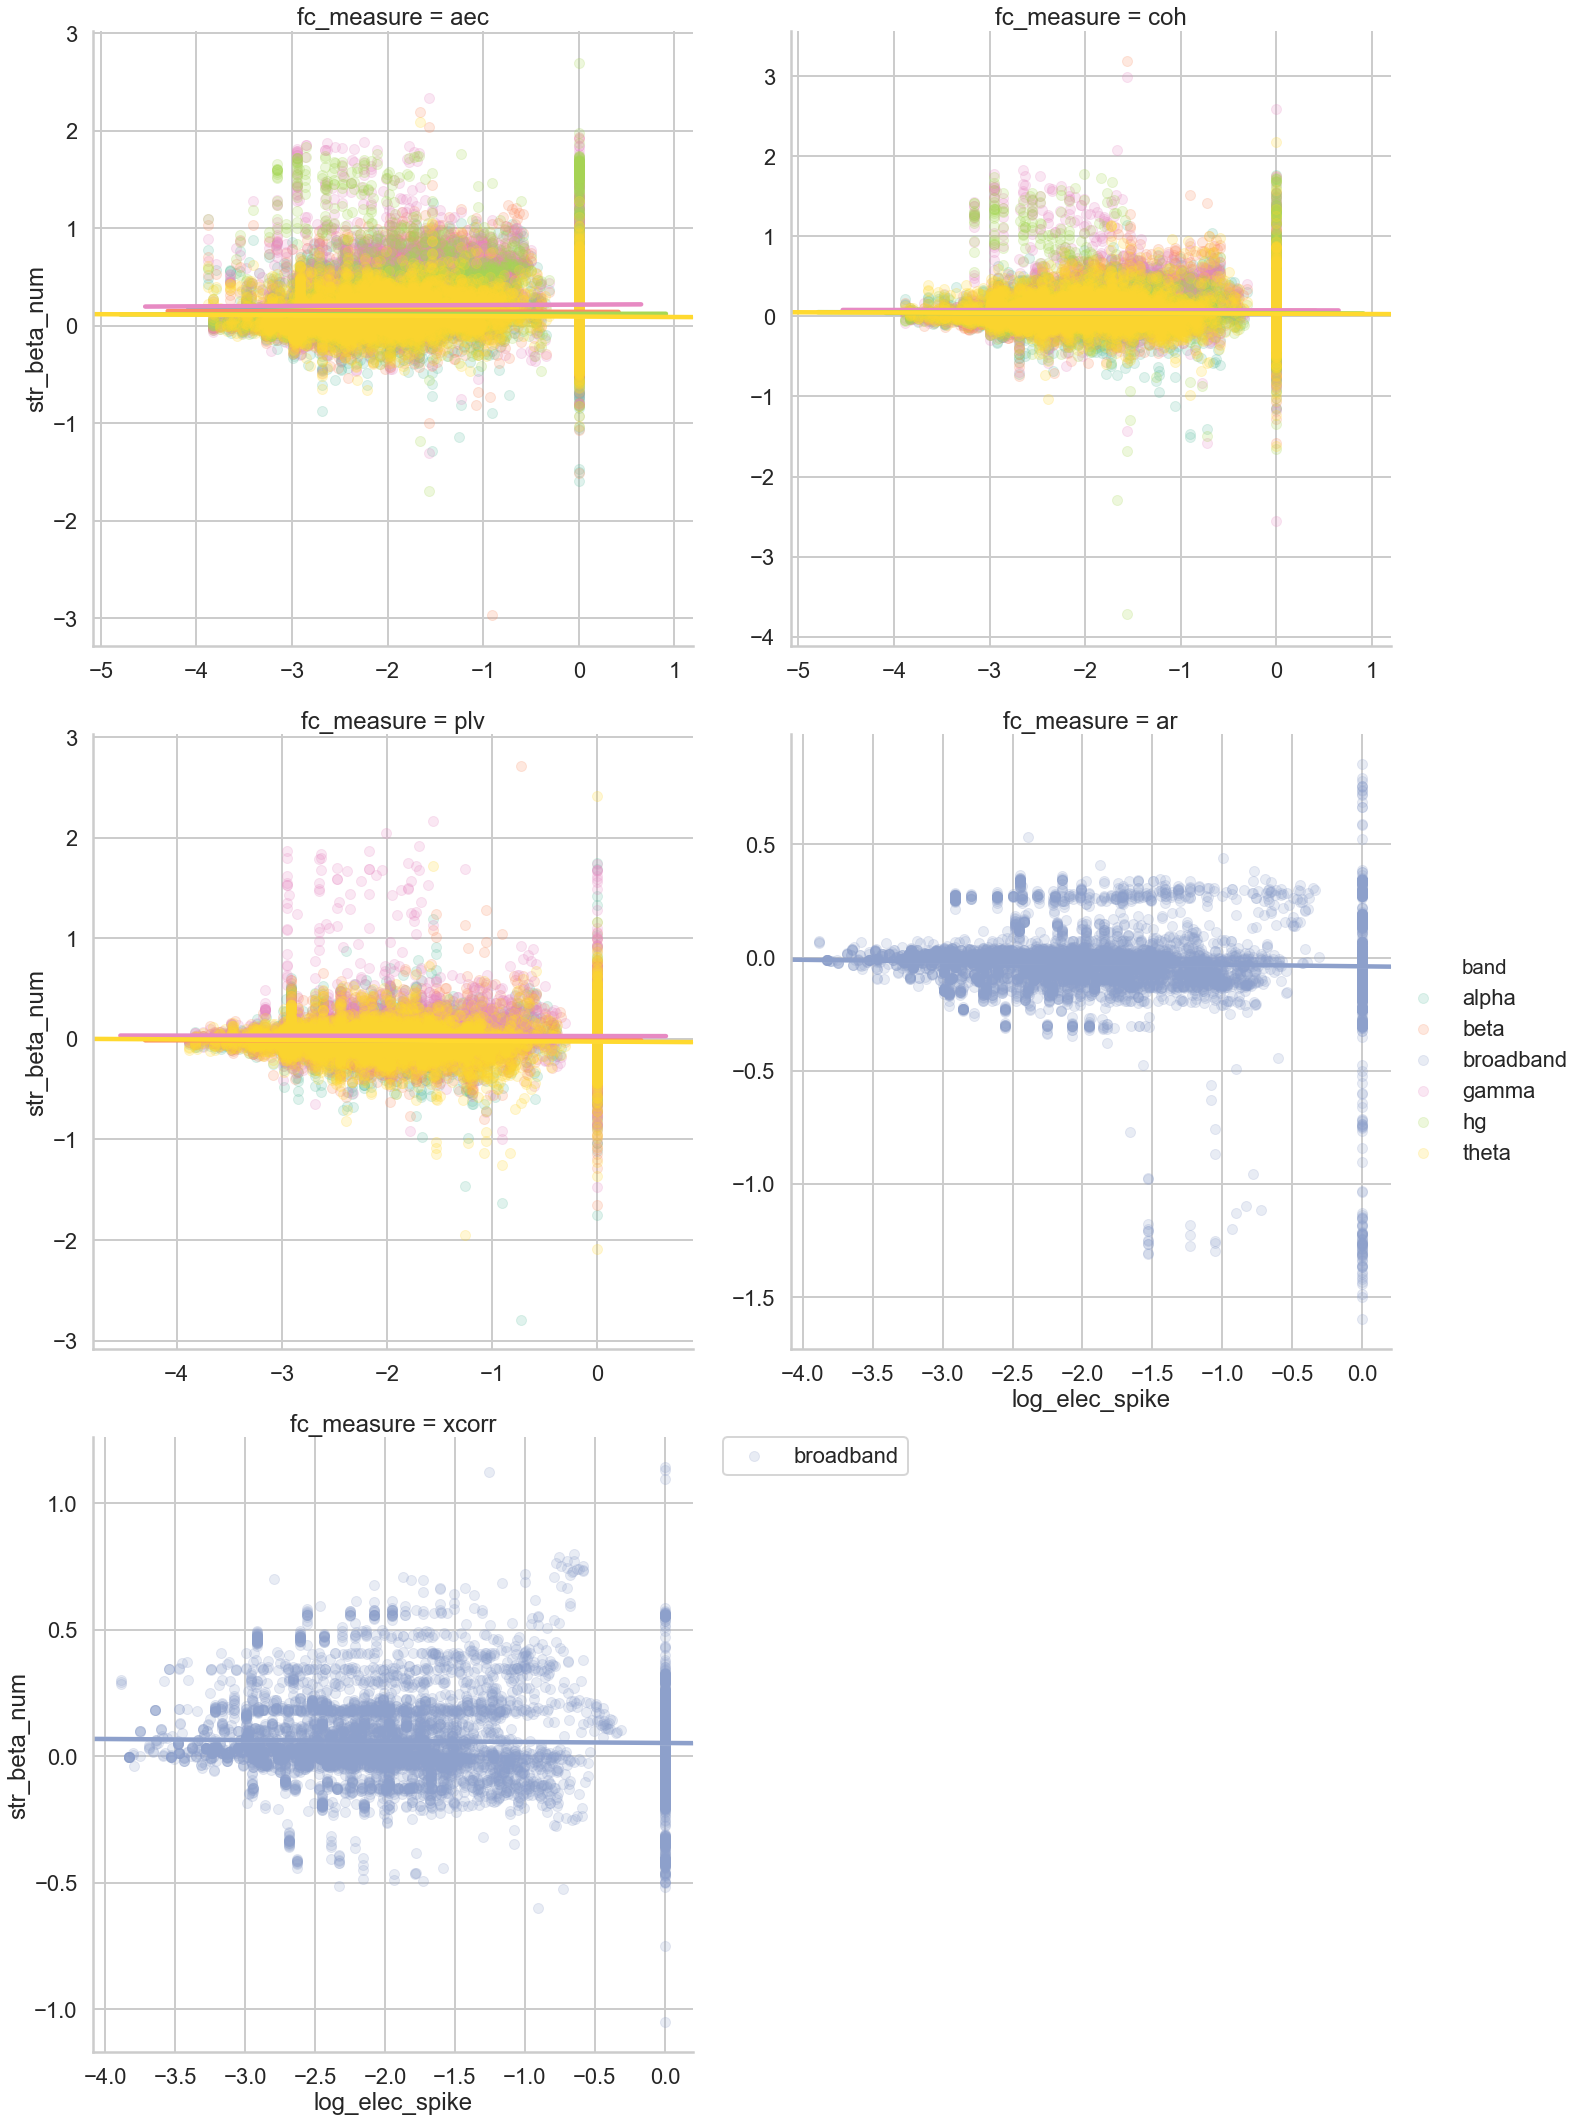

In [132]:
# add log transform
log_spike = np.zeros(np.shape(node_data['elec_spike']))
log_spike[[node_data['elec_spike'] != 0]] = np.log10(node_data['elec_spike'][node_data['elec_spike'] != 0])
node_data['log_elec_spike'] = log_spike

#color pallette
colors = ['#5b6c88', '#f0eee2']
custom_palette = sns.set_palette('Set2')

#plt.figure(figsize=(40,20))
sns.lmplot(data=node_data, x='log_elec_spike', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=2, height=10, sharex=False, sharey=False, robust=True, scatter_kws={'s':100, 'alpha':.2})

plt.legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    

Total strength

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


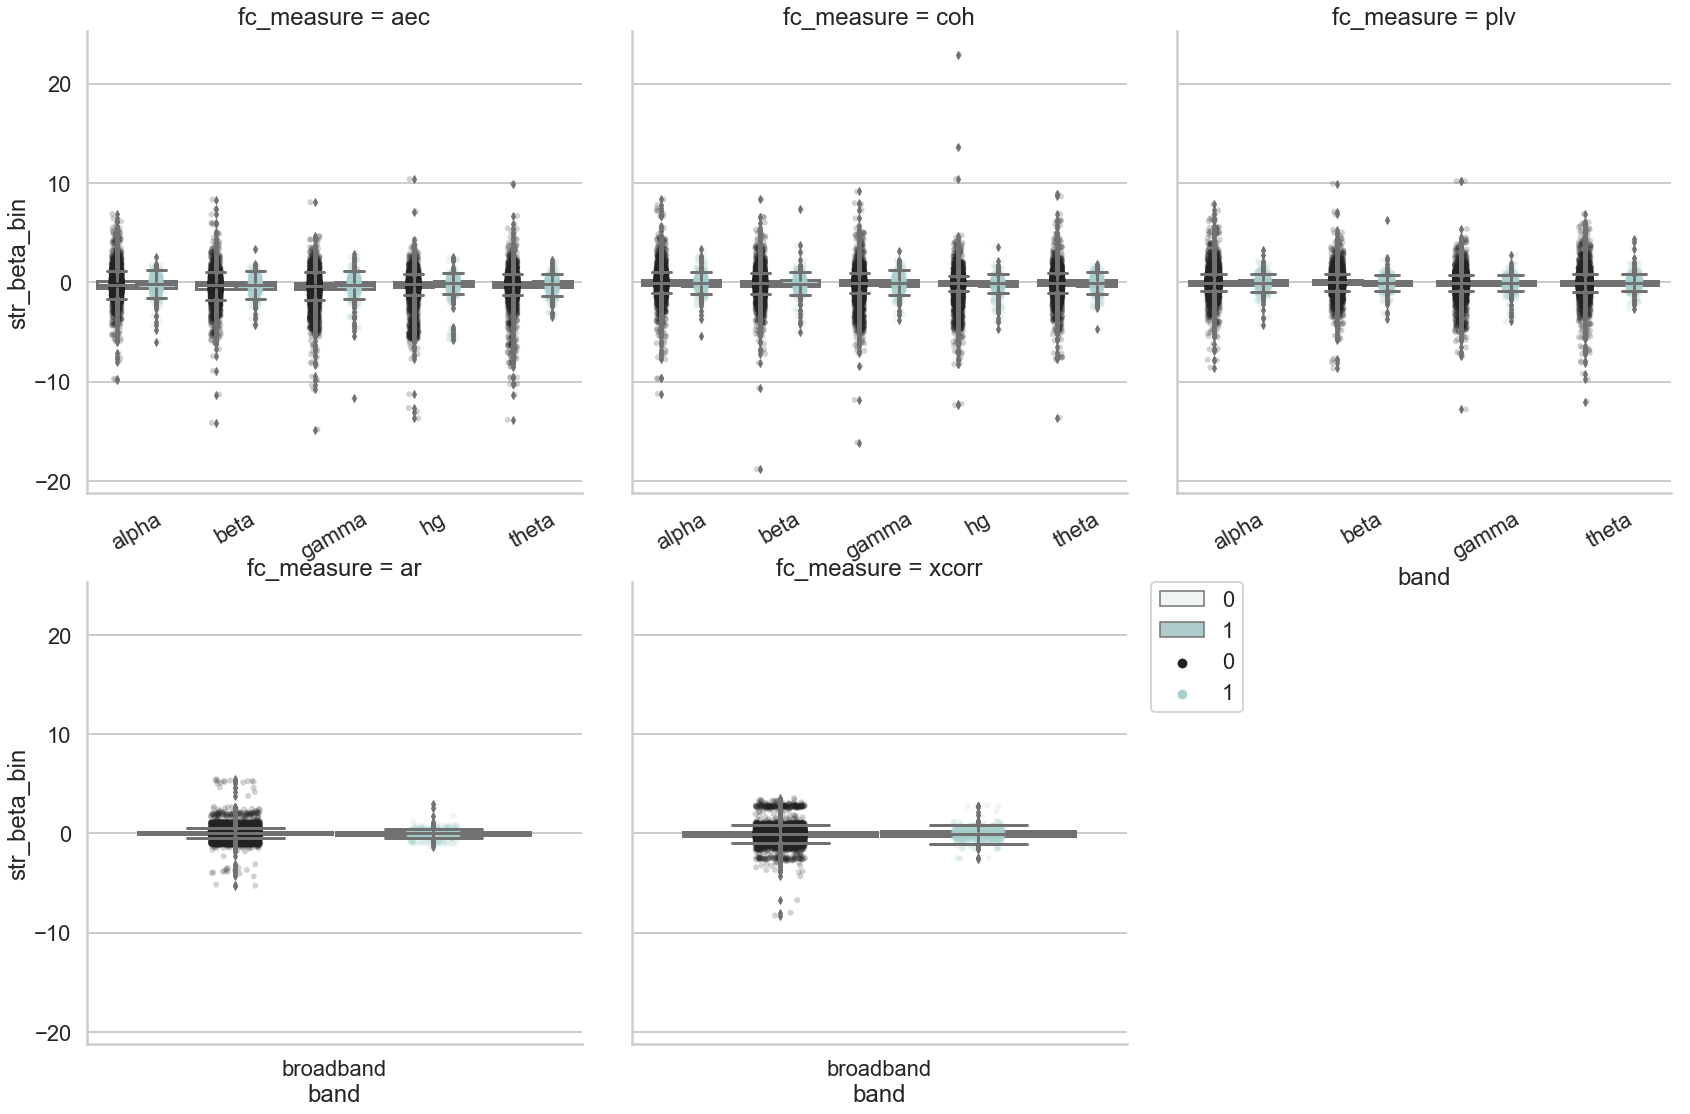

In [25]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_bin', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


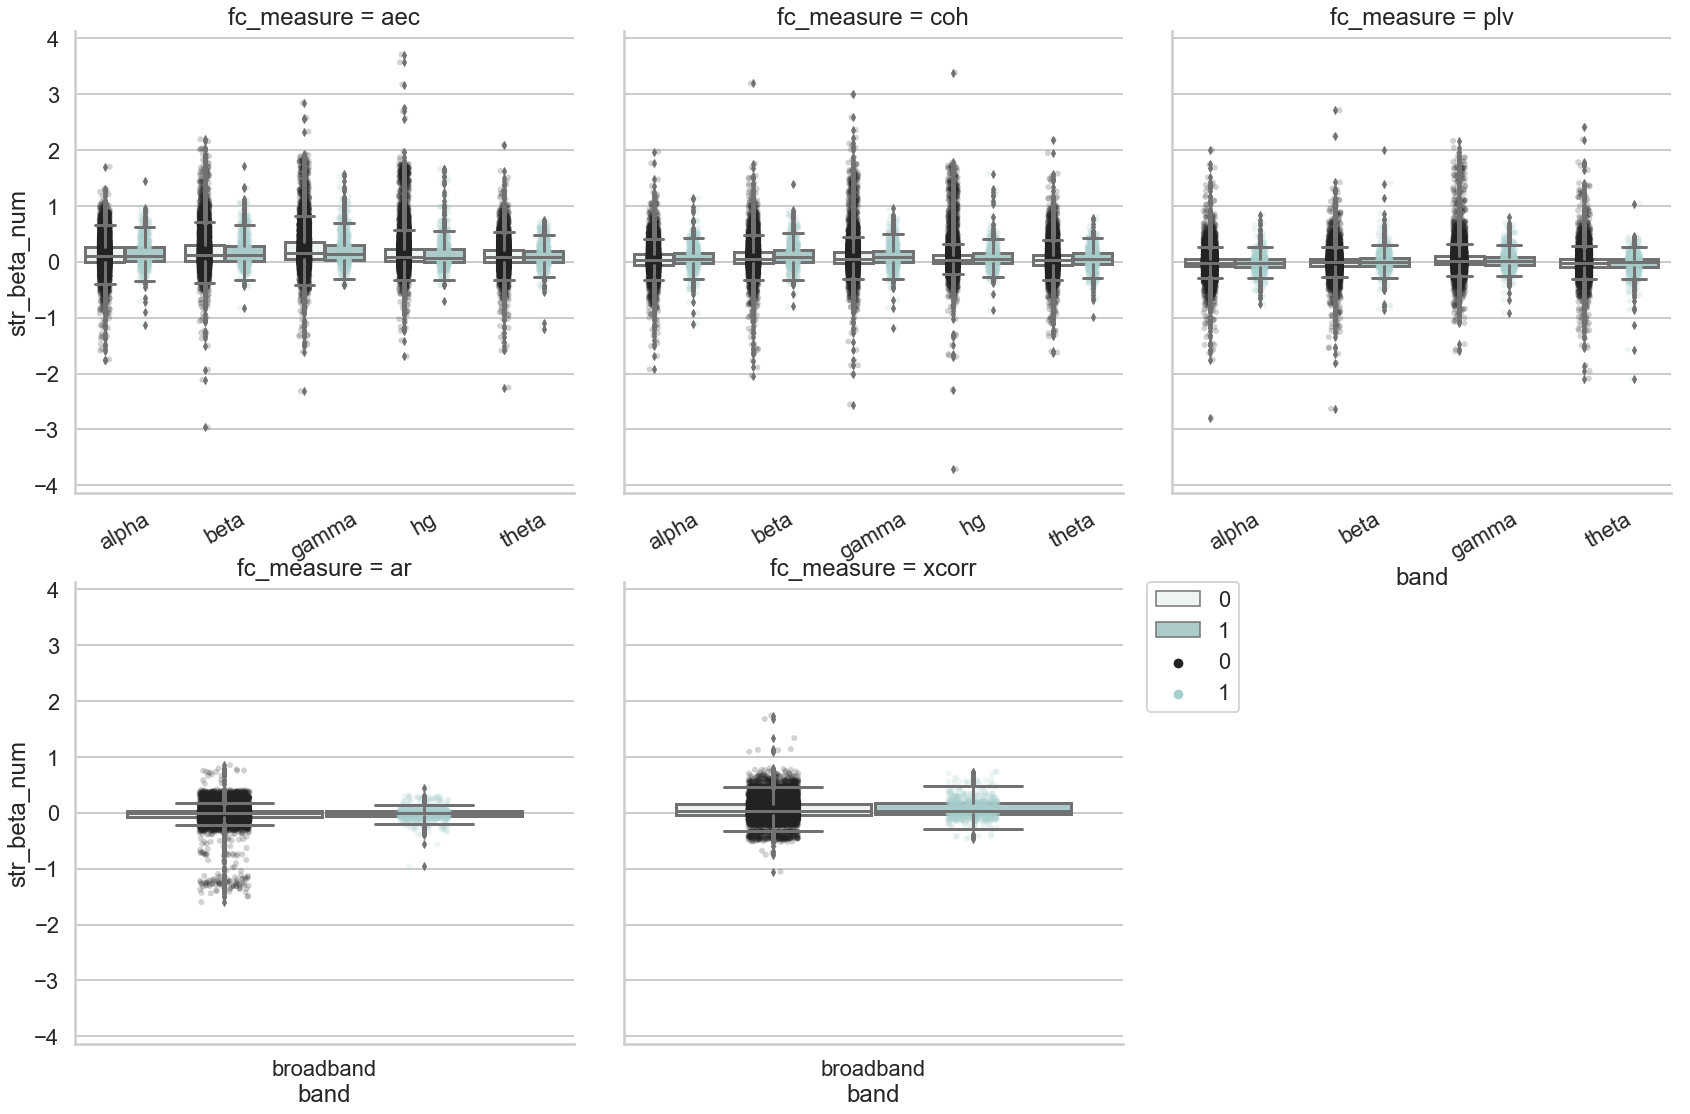

In [26]:
# grand teton natl park color pallette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))
    
g = sns.FacetGrid(data=node_data, col='fc_measure', col_wrap = 3, 
                  sharex=False, legend_out=True, palette = custom_palette, size=8)
g.map(sns.boxplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0, 1])
g.map(sns.stripplot, 'band', 'str_beta_num', 'elec_in_soz', hue_order = [0,1], jitter=True, dodge=True,
              alpha=.2, zorder=1, size=6)
g.axes[0].set_xticklabels(g.axes[0].xaxis.get_majorticklabels(),rotation=30)
g.axes[1].set_xticklabels(g.axes[1].xaxis.get_majorticklabels(),rotation=30)
g.axes[2].set_xticklabels(g.axes[2].xaxis.get_majorticklabels(),rotation=30)
g.axes[4].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)

### Categorize SOZ

In [198]:
temporal = ['lingual', 'bankssts', 'temp', 'hippo', 'rhin', 'fusiform']
frontal = ['front']

In [199]:
# check labels of elecs in soz. Mark as TLE if they contain temporal, 
# and FLE if frontal...for noww. would be better to have clinical 
# labels

epilepsy_type = pd.DataFrame(data={'subj':node_data.subj.unique(), 
                                   'locus':np.empty(node_data.subj.unique().shape)})
for index,row in epilepsy_type.iterrows():
    curr = node_data[node_data['subj'] == row.subj][node_data['elec_in_soz'] == 1]
    tle = [];
    fle = [];
    regions = curr.region.unique()
    for v in regions:
        if type(v) == str:
            tle.append(any([i in v for i in temporal]))
            fle.append(any([i in v for i in frontal]))
    if any(tle) and not any(fle):
        epilepsy_type.loc[index, 'locus'] = 'tle'
    elif any(fle) and not any(tle):
        epilepsy_type.loc[index, 'locus'] = 'fle'
    else:
        epilepsy_type.loc[index,'locus'] = 'amb'
    
epilepsy_type.head()           

/Users/stiso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


subj locus
0  R1284N   amb
1  R1276D   tle
2  R1264P   tle
3  R1263C   amb
4  R1260D   amb

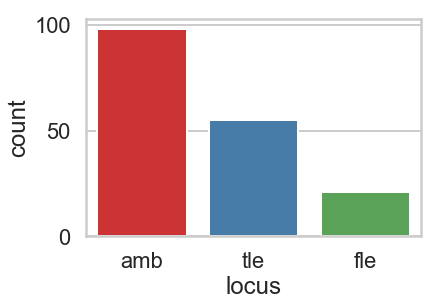

In [200]:
sns.countplot(data=epilepsy_type, x='locus')

In [210]:
# add locus back to big data frames
net_data = pd.merge(net_data, epilepsy_type, on='subj')
node_data = pd.merge(node_data, epilepsy_type, on='subj')
net_data.head()

band_measure  n_tp  str_beta_bin  str_beta_num  str_soz_beta_bin  \
0    alpha_aec    53     -0.796951      0.179940         -1.051499   
1    alpha_coh    53     -0.736934      0.392401         -0.757353   
2    alpha_plv    53     -0.687027      0.460719         -0.001331   
3     beta_aec    53     -0.529996      0.307995         -0.610188   
4     beta_coh    53     -1.815818      0.743932         -1.997442   

   str_soz_beta_num  str_not_soz_beta_num  str_spike_beta_num  \
0          0.254939              0.164489            0.069869   
1          0.286302              0.245035            0.886089   
2          0.162628              0.872755            0.211031   
3          0.253476              0.510246            0.144966   
4          0.887178              0.183697            0.640566   

   str_not_soz_beta_bin  str_spike_beta_bin  ...   str_not_spike_beta_num  \
0             -0.643755           -0.640791  ...                 0.167144   
1             -0.304555           -2.052647  ...                -0.003821   
2             -1.481435           -0.225980  ...                 0.537569   
3             -0.977428           -0.416027  ...                 0.370774   
4             -0.668023           -1.549742  ...                 0.529372   

    band    subj hand   age gender  race locus_x  locus_y locus  
0  alpha  R1260D    R  57.0      F   2.0     amb      amb   amb  
1  alpha  R1260D    R  57.0      F   2.0     amb      amb   amb  
2  alpha  R1260D    R  57.0      F   2.0     amb      amb   amb  
3   beta  R1260D    R  57.0      F   2.0     amb      amb   amb  
4   beta  R1260D    R  57.0      F   2.0     amb      amb   amb  

[5 rows x 22 columns]

In [202]:
node_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365920 entries, 0 to 365919
Data columns (total 29 columns):
elec                      365920 non-null object
band_measure              365920 non-null object
n_tp                      365920 non-null int64
elec_spike                365920 non-null float64
elec_in_soz               365920 non-null int64
str_soz_beta_bin          253008 non-null float64
str_not_soz_beta_bin      233342 non-null float64
str_spike_beta_bin        237792 non-null float64
str_not_spike_beta_bin    210684 non-null float64
str_beta_bin              353536 non-null float64
str_soz_beta_num          253008 non-null float64
str_not_soz_beta_num      233342 non-null float64
str_spike_beta_num        237792 non-null float64
str_beta_num              353536 non-null float64
str_not_spike_beta_num    210684 non-null float64
fc_measure                365920 non-null object
band                      365920 non-null object
region                    334176 non-null objec

## Net plots with category by locus

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


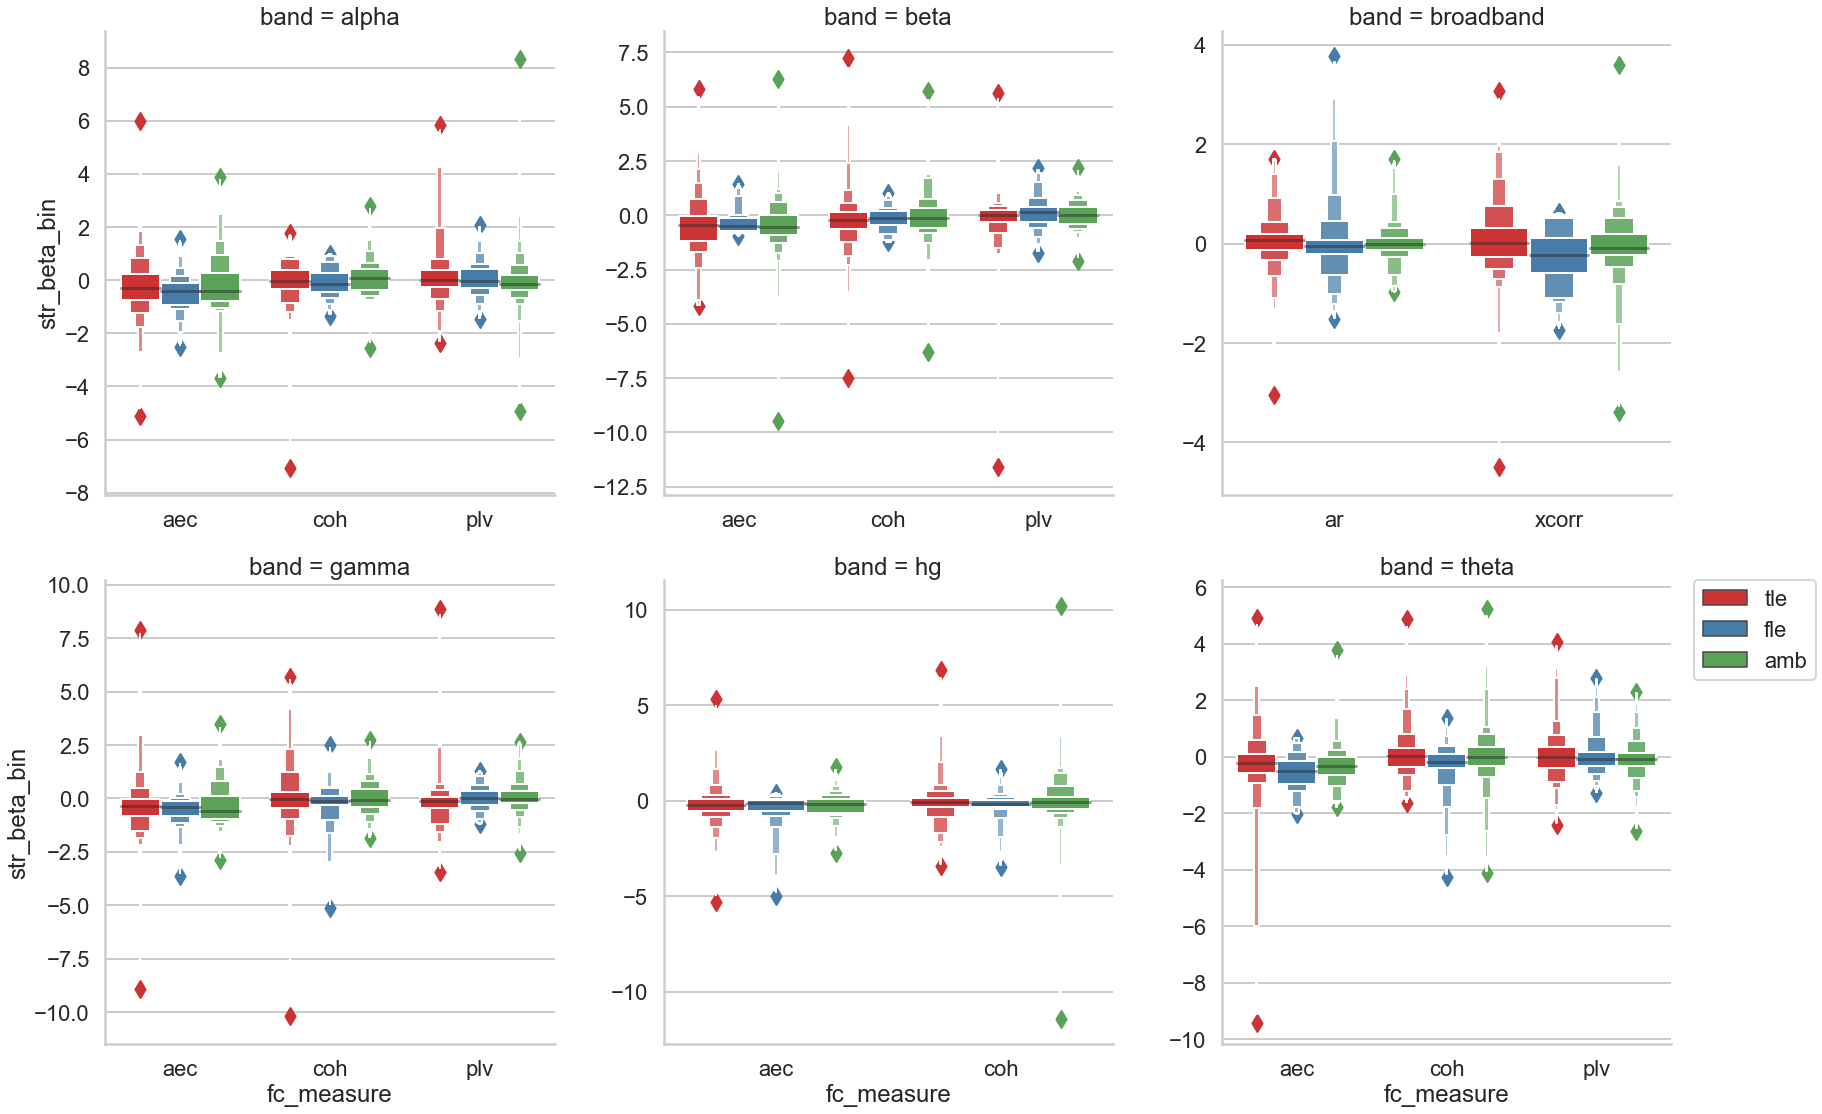

In [212]:
# grand teton palette
colors = ['#a8d0cf', '#babbb1']
custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_bin', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
#g.map(sns.stripplot, 'fc_measure', 'str_beta_bin', 'locus', hue_order = ['tle','fle','amb'],jitter=True, dodge=True,
#              alpha=.2, zorder=1, size=6)
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-5,5)
    
#g.savefig("../img/net_num.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxenplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


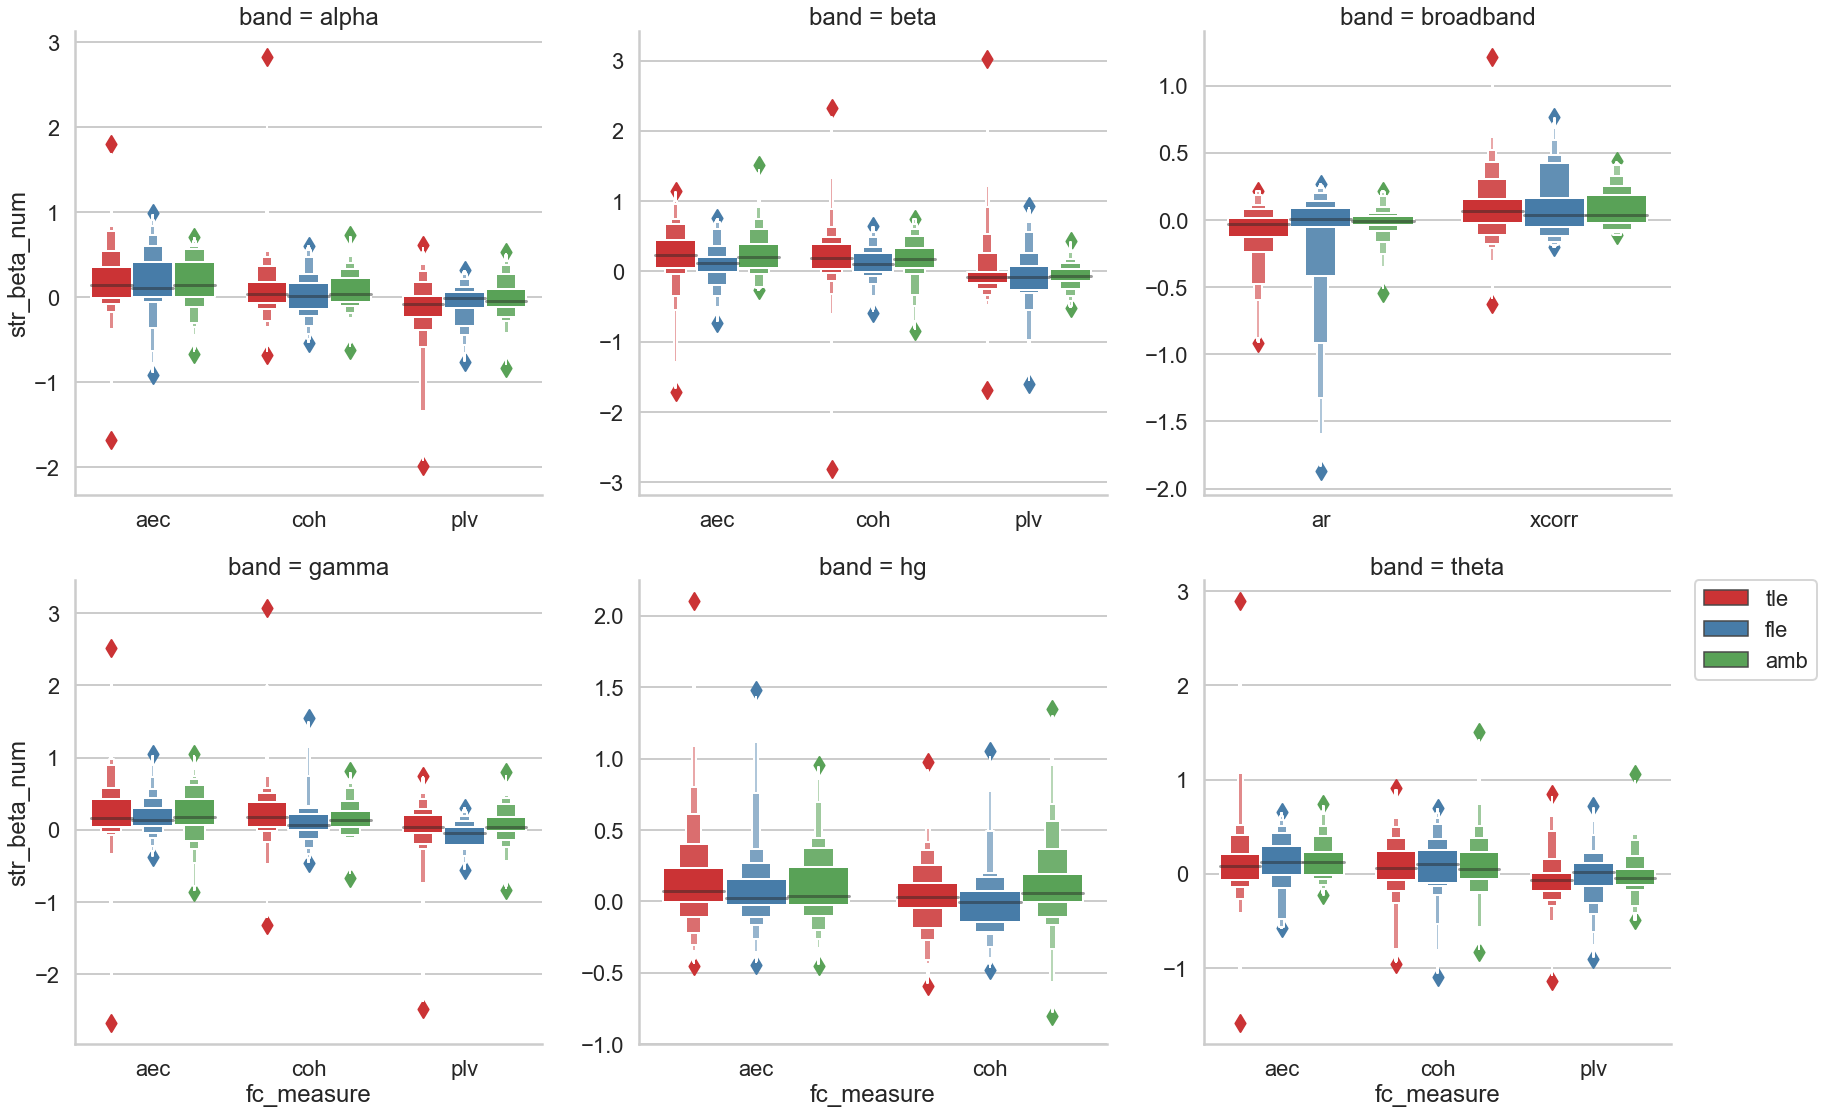

In [213]:
g = sns.FacetGrid(data=net_data, col='band' ,col_wrap = 3, 
                  sharex=False, sharey=False, legend_out=True, height=8)
g.map(sns.boxenplot, 'fc_measure', 'str_beta_num', 'locus', palette = "Set1", hue_order = ['tle','fle','amb'])
g.axes[5].legend(bbox_to_anchor = (1.05,1), loc=2, borderaxespad=0.)
#for ax in g.axes:
#    ax.set_ylim(-2,2)
    
#g.savefig("../img/net_num.eps")

## Behavior

In [267]:
task_data = pd.read_csv(RAM_dir + 'group_analysis/task_performance.csv', index_col=0)
task_data.reset_index(inplace=True)
task_data.head(10)

subj        YC  TH       PAL  catFR        FR
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573
1  R1002P       NaN NaN  0.492335    NaN  0.945857
2  R1003P       NaN NaN  0.083711    NaN  0.602817
3  R1004D       NaN NaN       NaN  0.625       NaN
4  R1006P  0.401778 NaN       NaN    NaN  0.779412
5  R1008J  0.530724 NaN       NaN    NaN       NaN
6  R1009W  0.183700 NaN       NaN    NaN       NaN
7  R1010J  0.358207 NaN       NaN    NaN  0.825373
8  R1013E  0.182021 NaN       NaN    NaN       NaN
9  R1014D  0.354468 NaN       NaN    NaN       NaN

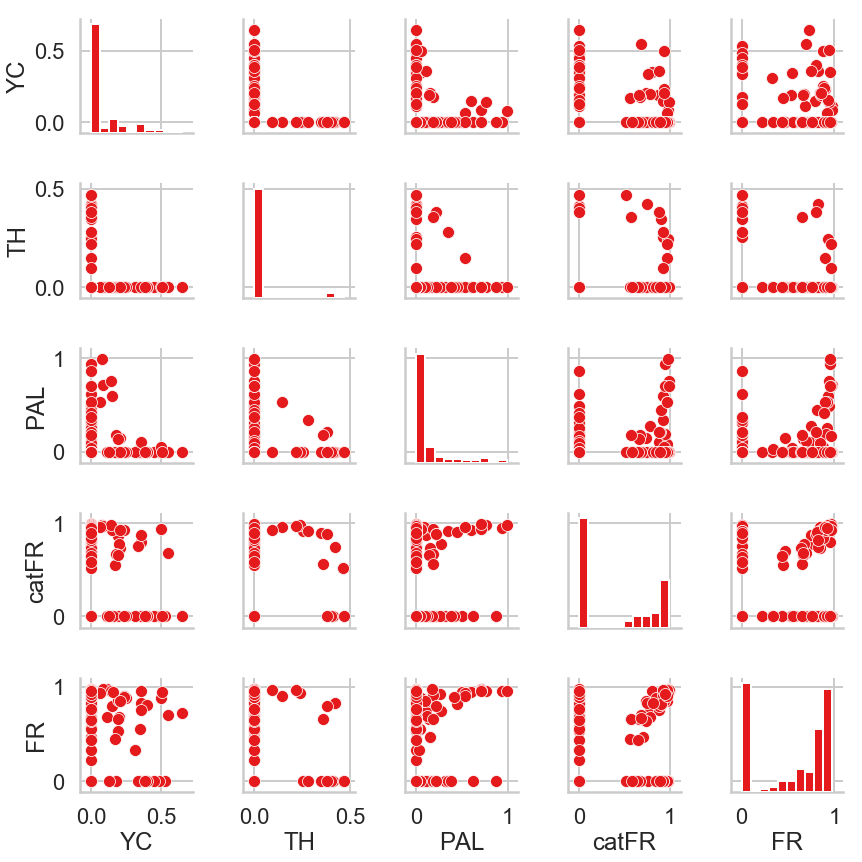

In [282]:
sns.pairplot(data=task_data.fillna(0), vars=['YC','TH','PAL','catFR','FR'])

In [316]:
# add averages over recal and nav tasks
task_data = task_data.assign(recall = task_data[['catFR','FR','PAL']].mean(axis=1, skipna=True))
task_data = task_data.assign(nav = task_data[['TH','YC']].mean(axis=1, skipna=True))
task_data.head()

subj        YC  TH       PAL  catFR        FR    recall       nav
0  R1001P  0.345526 NaN  0.041370    NaN  0.546573  0.293972  0.345526
1  R1002P       NaN NaN  0.492335    NaN  0.945857  0.719096       NaN
3  R1004D       NaN NaN       NaN  0.625       NaN  0.625000       NaN
5  R1008J  0.530724 NaN       NaN    NaN       NaN       NaN  0.530724
7  R1010J  0.358207 NaN       NaN    NaN  0.825373  0.825373  0.358207

In [317]:
# merge with net_data
subj_idx = [x in net_data.subj.unique() for x in task_data.subj]
task_data = task_data[subj_idx]
net_task_data = pd.merge(net_data, task_data, on=['subj'])
net_task_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2538 entries, 0 to 2537
Data columns (total 26 columns):
band_measure              2538 non-null object
n_tp                      2538 non-null int64
str_beta_bin              2538 non-null float64
str_beta_num              2538 non-null float64
str_soz_beta_bin          2538 non-null float64
str_soz_beta_num          2538 non-null float64
str_not_soz_beta_num      2538 non-null float64
str_spike_beta_num        2538 non-null float64
str_not_soz_beta_bin      2538 non-null float64
str_spike_beta_bin        2538 non-null float64
str_not_spike_beta_bin    2538 non-null float64
fc_measure                2538 non-null object
str_not_spike_beta_num    2538 non-null float64
band                      2538 non-null object
subj                      2538 non-null object
hand                      2538 non-null object
age                       2538 non-null float64
gender                    2538 non-null object
race                      2538 non-nu

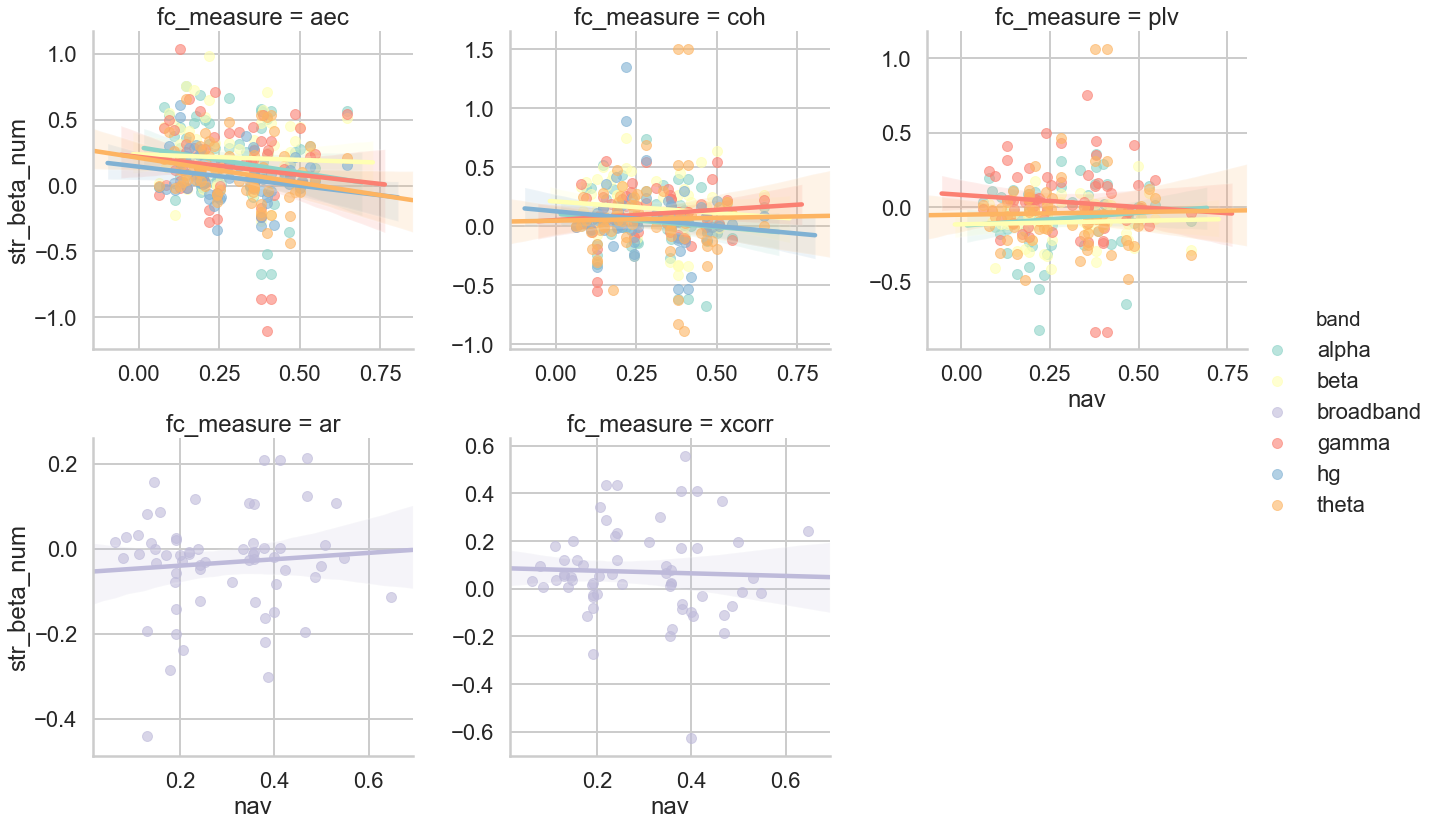

In [328]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_num', hue='band', col="fc_measure", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set3', scatter_kws={'s':100, 'alpha':.6})

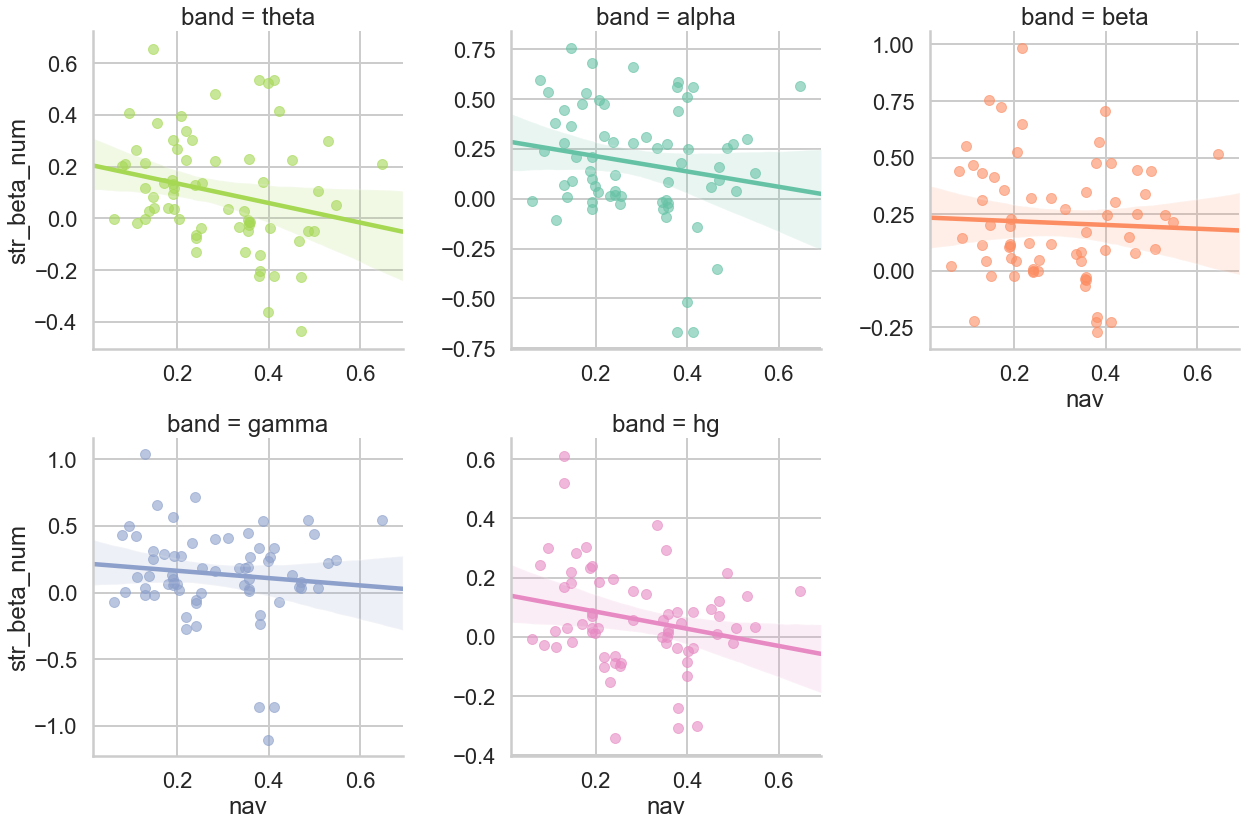

In [356]:
sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6}, col_order=['theta','alpha','beta','gamma','hg'])
g.savefig("../img/task_perf_band.eps")

In [ ]:
g = sns.lmplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', hue='band', fit_reg=False,
           height=6, sharex=False, sharey=False, palette='Set2', scatter_kws={'s':100, 'alpha':.6})
sns.regplot(data=net_task_data[net_task_data['fc_measure'] == 'aec'], x='nav', y='str_beta_num', scatter=False, ax=g.axes[0,0], color='black')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.savefig("../img/task_perf_band.eps")

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


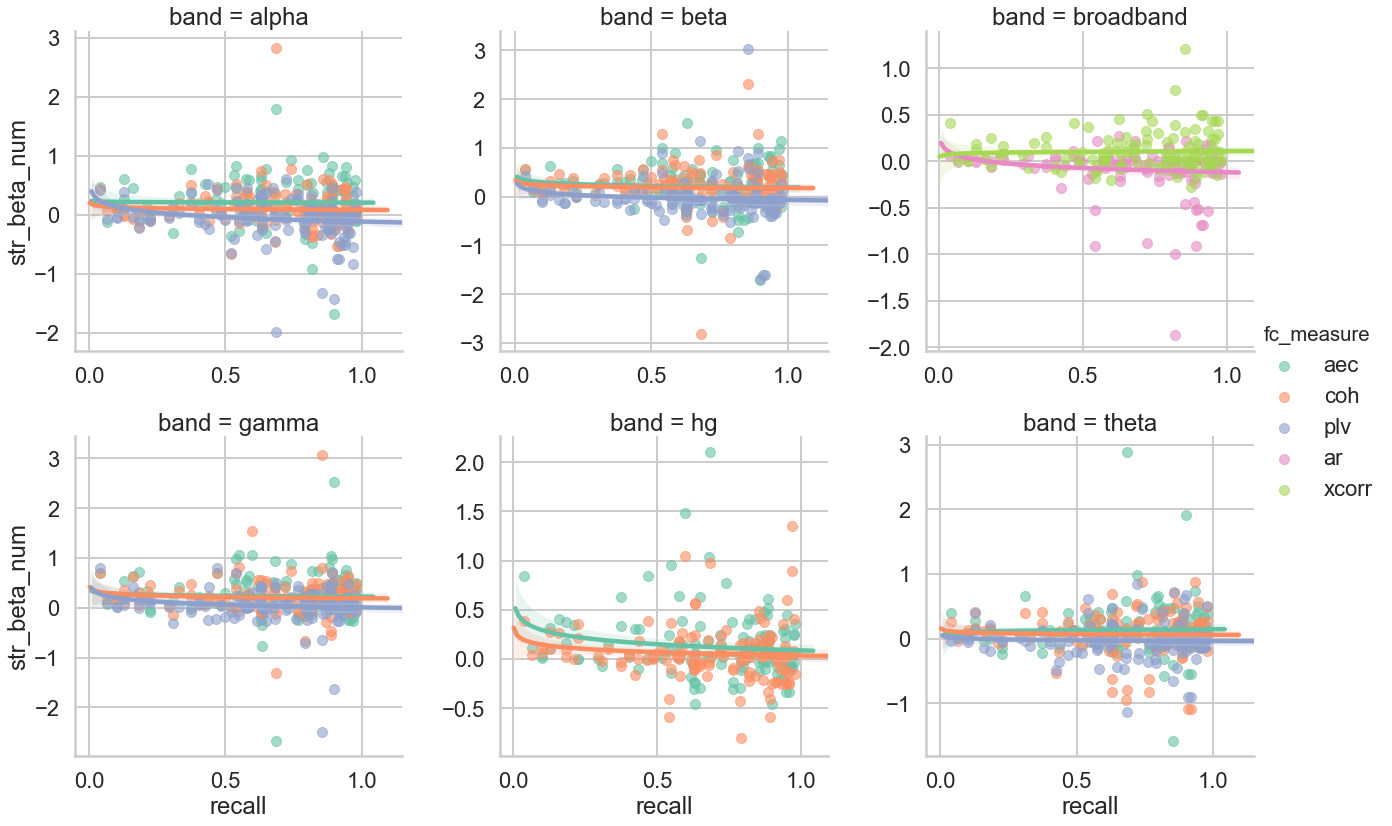

In [321]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_num', hue='fc_measure', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', logx=True, scatter_kws={'s':100, 'alpha':.6})

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


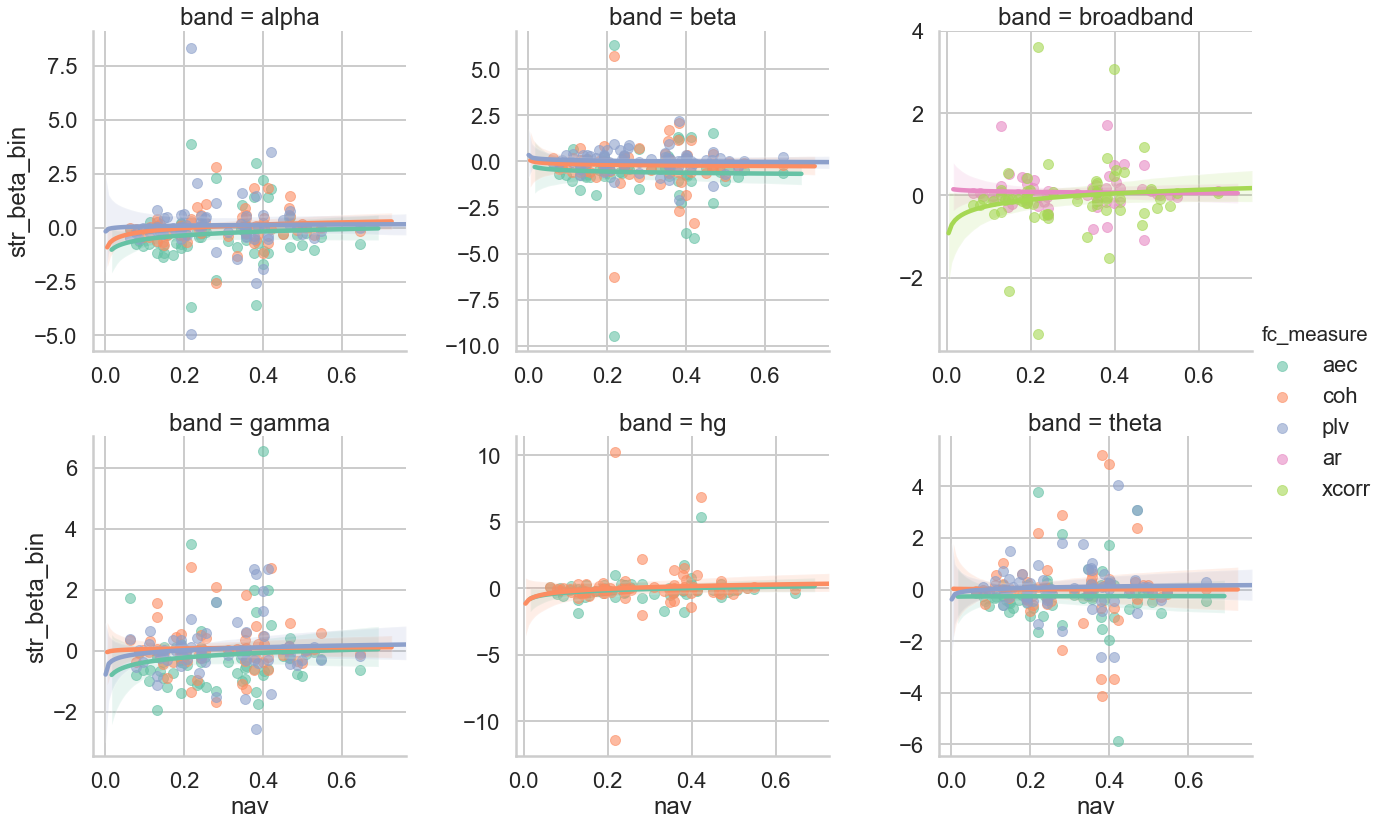

In [322]:
sns.lmplot(data=net_task_data, x='nav', y='str_beta_bin', hue='fc_measure', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', logx=True, scatter_kws={'s':100, 'alpha':.6})

/Users/stiso/anaconda3/lib/python3.6/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


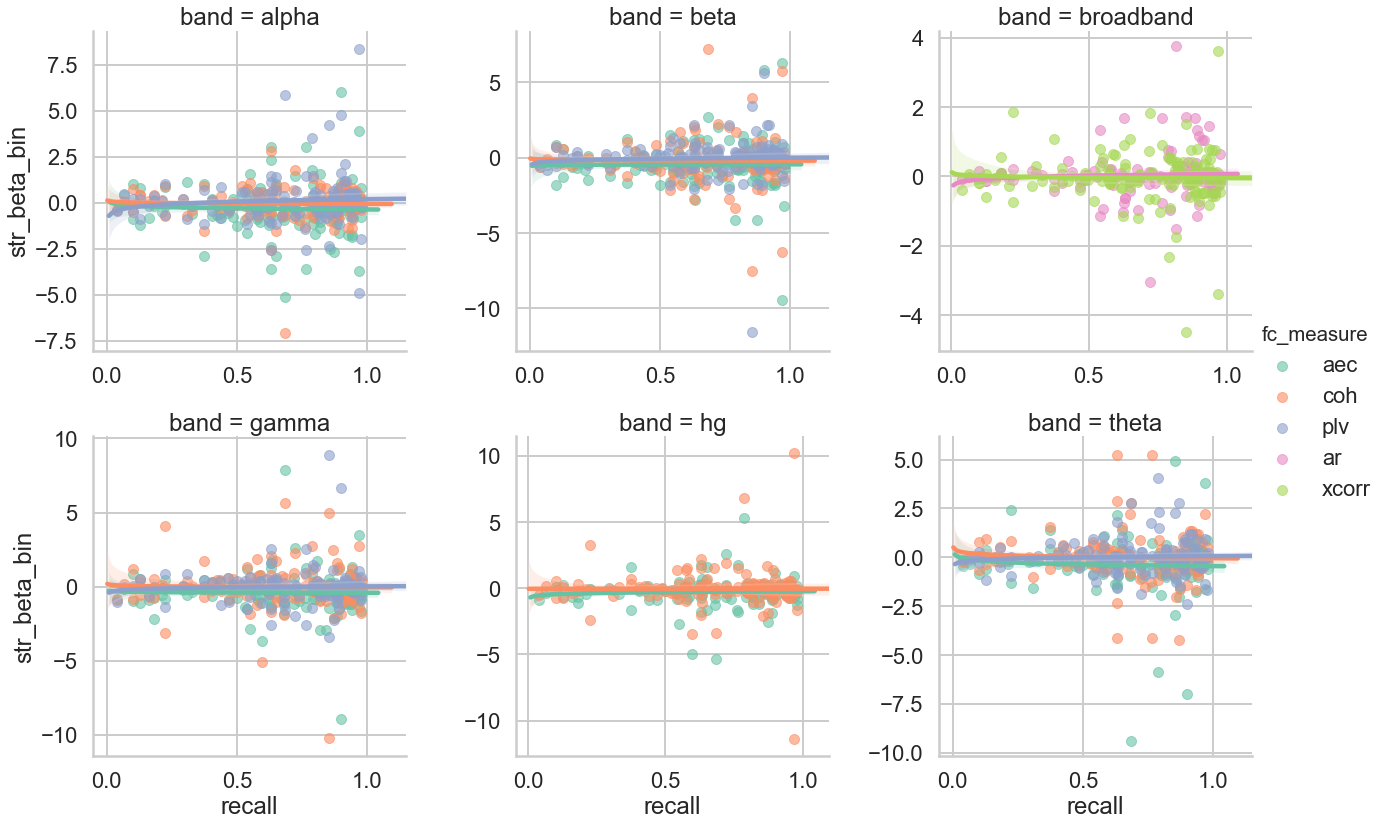

In [323]:
sns.lmplot(data=net_task_data, x='recall', y='str_beta_bin', hue='fc_measure', col="band", 
           col_wrap=3, height=6, sharex=False, sharey=False, palette='Set2', logx=True, scatter_kws={'s':100, 'alpha':.6})

In [326]:
# save
net_task_data.to_csv('/Volumes/bassett-data/Jeni/RAM/group_analysis/net_task_data_clean.csv')